# 📊 <center>**Car Price Prediction Analysis**</center>
<center>(Summary)</center>

## 📋 Table of Contents

- [📖 Introduction](#Introduction)
- [🔧 Importing Libraries](#Importing-Libraries)
- [🧹 Data Preprocessing](#Data-Preprocessing)
  - [🎯 Target Mean Encoding](#Target-Mean-Encoding)
  - [📊 Categorical EDA](#Categorical-EDA)
  - [🛠️ Manual Imputing Categories](#Manual-Imputing-Categories)
  - [🔢 Numerical EDA](#Numerical-EDA)
- [🔍 Feature Engineering](#Feature-Engineering)
  - [📉 Variance Inflation Factor Checking](#Variance-Inflation-Factor-Checking)
  - [📈 Feature Selection by Correlation](#Feature-Selection-by-Correlation)
- [📐 Regularization](#Regularization)
  - [🔗 Ridge Regression](#Ridge-Regression)
- [🔍 Error Analysis](#Error-Analysis)
  - [🔍 Extracting and Analyzing Residuals from Previous Modeling](#Extracting-and-Analyzing-Residuals-from-Previous-Modeling)
  - [🧪 Initial Testing](#Initial-Testing)
    - [🔍 Shapiro-Wilk Tests](#Shapiro-Wilk-Tests)
    - [🔍 Breusch-Pagan Test](#Breusch-Pagan-Test)
    - [🔍 Durbin-Watson Test](#Durbin-Watson-Test)
    - [🔍 Multicollinearity Tests](#Multicollinearity-Tests)
  - [🛠️ Solutions](#Solutions)
    - [🔄 Adding Omitted Features](#Adding-Omitted-Features)
    - [🔄 Enhancing the Distribution of New Features Close to Normal](#Enhancing-the-Distribution-of-New-Features-Close-to-Normal)
    - [🔄 Transforming Target Variable](#Transforming-Target-Variable)
  - [🗑️ Removing High-Influential Points](#Removing-High-Influential-Points)
  - [🤖 Modeling](#Modeling)
  - [🧪 Final Testing](#Final-Testing)
- [🔗 Ensembling](#Ensembling)
  - [🔗 Pipeline Building](#Pipeline-Building)
  - [🔗 Bagging](#Bagging)
  - [🔗 Boosting](#Boosting)
  - [🧪 Testing](#Testing)
  - [🔙 Original Scale Predictions](#Original-Scale-Predictions)
- [🏆 Results](#Results)
- [📝 Conclusion](#Conclusion)

## 📖 Introduction
### Week 1 Regression Analysis:
- This is a summary notebook for Car Price prediction analysis

## Importing Libraries

In [1]:
import sys
sys.path.append("../")
import warnings
warnings.simplefilter(action="ignore")
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *
from functions.pipeline_helpers import *

In [2]:
data=pl.read_csv("./data/W1_carPrices/CarPrice_Assignment.csv")
data.head()

car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,i64,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
1,3,"""alfa-romero giulia""","""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,"""alfa-romero stelvio""","""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,"""alfa-romero Quadrifoglio""","""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,"""audi 100 ls""","""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
5,2,"""audi 100ls""","""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0


Check for Linearity between independent variables and dependent variable

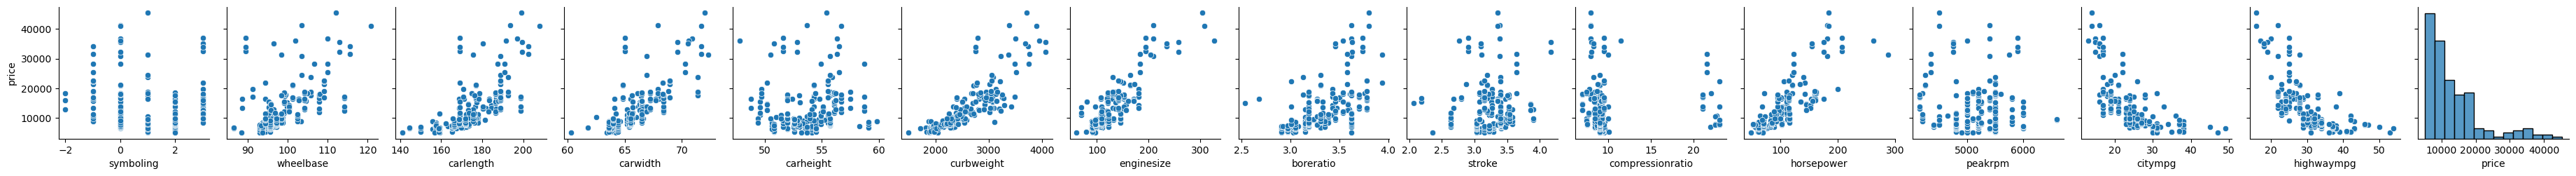

In [3]:
sns.pairplot(data.drop("car_ID").to_pandas(),y_vars=["price"])
plt.show()

Dependent variable is much skewed and many linear regression assumption are violating

Missing Values

In [4]:
data.null_count()

car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No missing

In [5]:
data.shape,data.unique(subset=data.drop("car_ID").columns,maintain_order=True).shape

((205, 26), (205, 26))

In [6]:
cat_cols=[col for col in data.columns if data[col].dtype== pl.String]
num_cols=[col for col in data.drop("car_ID","price").columns if data[col].dtype!= pl.String]

### Splitting data to avoiding data leakages [Learn more](https://en.wikipedia.org/wiki/Leakage_(machine_learning))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop("price"),data[["car_ID","price"]],test_size=0.3,random_state=42,shuffle=True,stratify=data[['symboling']])
train_data=X_train.join(y_train,on="car_ID")
test_data=X_test.join(y_test,on="car_ID")
train_data.shape,test_data.shape

((143, 26), (62, 26))

random state 42 for every process for consistency

## Data Preprocessing

### Target Mean Encoding ##

extracting brand names

In [8]:
l=data["CarName"].str.split(" ")
brands=[]
for i in l:
    brands.append(i[0])
data=data.with_columns(pl.Series(brands).alias("CarName"))
data=data.with_columns(data["CarName"].str.replace("porsche","porcshce"))

In [9]:
train_data=train_data.drop("CarName").join(data[["car_ID","CarName"]],on="car_ID")
test_data=test_data.drop("CarName").join(data[["car_ID","CarName"]],on="car_ID")

In [10]:
encoder_list=train_data[['CarName','price']].group_by(["CarName"]).agg(pl.median("price")).sort(by="price")
encoder_list

CarName,price
str,f64
"""Nissan""",5499.0
"""maxda""",5645.0
"""chevrolet""",6435.0
"""plymouth""",6919.0
"""honda""",7295.0
…,…
"""volvo""",18420.0
"""bmw""",27662.5
"""porcshce""",31964.25


In [11]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile') # from power bi report 4 bins looks good

discretizer.fit(encoder_list[['price']])
bins = discretizer.transform(encoder_list[['price']])

# Print bin labels (array format)
encoder_list=encoder_list.hstack(pl.DataFrame(bins,schema=["carclass"]))
encoder_list

CarName,price,carclass
str,f64,f64
"""Nissan""",5499.0,0.0
"""maxda""",5645.0,0.0
"""chevrolet""",6435.0,0.0
"""plymouth""",6919.0,0.0
"""honda""",7295.0,0.0
…,…,…
"""volvo""",18420.0,3.0
"""bmw""",27662.5,3.0
"""porcshce""",31964.25,3.0


Checking for new brands in test

In [12]:
for i in set(test_data["CarName"]):
    if i not in set(train_data["CarName"]):
        print(i)

No new brands in test set,otherwise some replacing techniques should be adadpted like knnclassifer to guess closer brand

In [13]:
def mean_encoder(x):
    if encoder_list.filter(encoder_list['CarName']==x).is_empty(): # For new brands imputing with mean prices
        return encoder_list['price'].median()
    return encoder_list.filter(encoder_list['CarName']==x)['price'][0]
def car_class(x):
    if encoder_list.filter(encoder_list['CarName']==x).is_empty(): # For new brands imputing with mean prices
        return encoder_list['carclass'].median()                     
    return encoder_list.filter(encoder_list['CarName']==x)["carclass"][0]
    
train_data=train_data.with_columns(train_data['CarName'].map_elements(lambda x:car_class(x),return_dtype=pl.Float64).alias("carclass"))
test_data=test_data.with_columns(test_data['CarName'].map_elements(lambda x:car_class(x),return_dtype=pl.Float64).alias("carclass"))
train_data=train_data.with_columns(train_data['CarName'].map_elements(lambda x:mean_encoder(x),return_dtype=pl.Float64).alias("brandavg")).drop("CarName")
test_data=test_data.with_columns(test_data['CarName'].map_elements(lambda x:mean_encoder(x),return_dtype=pl.Float64).alias("brandavg")).drop("CarName")

In [14]:
cat_cols=[col for col in train_data.columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("car_ID","price").columns if train_data[col].dtype!= pl.String]

### Categorical EDA

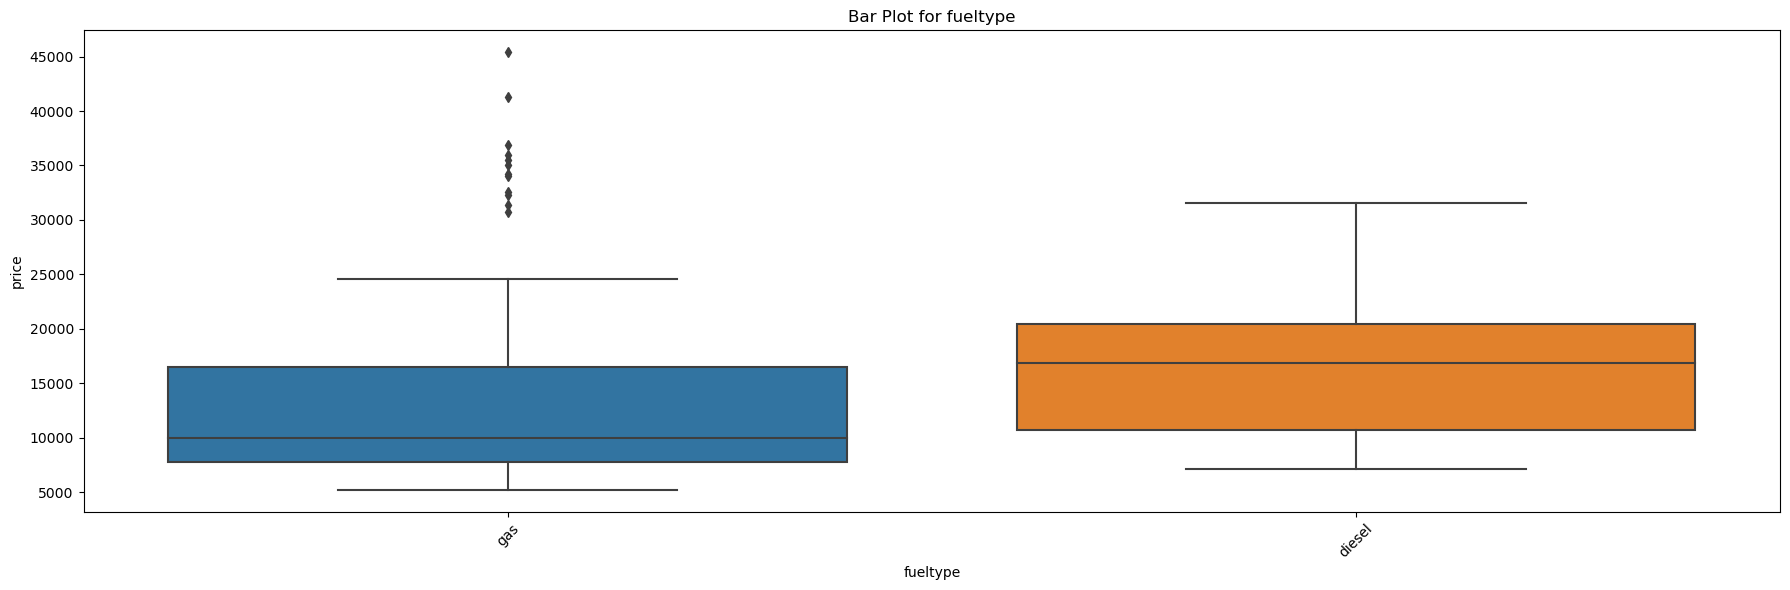

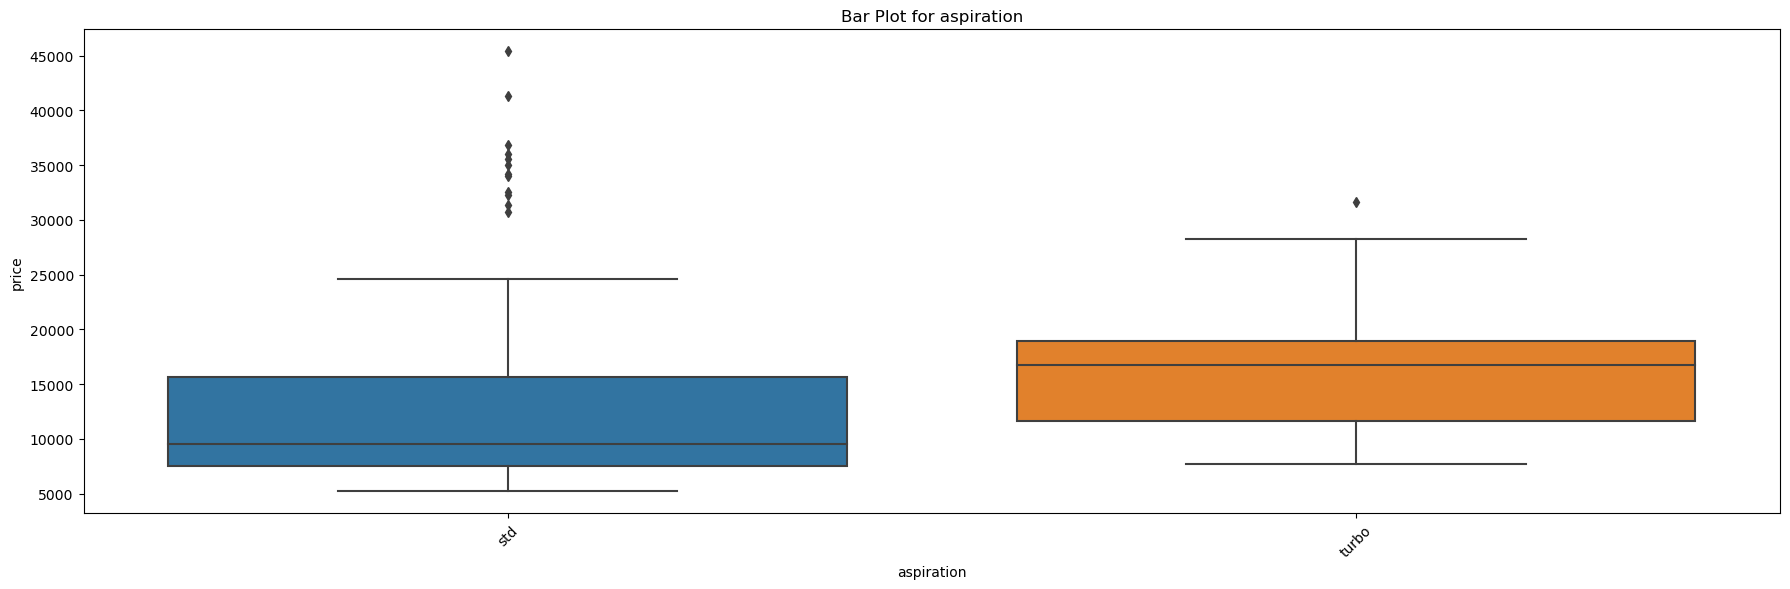

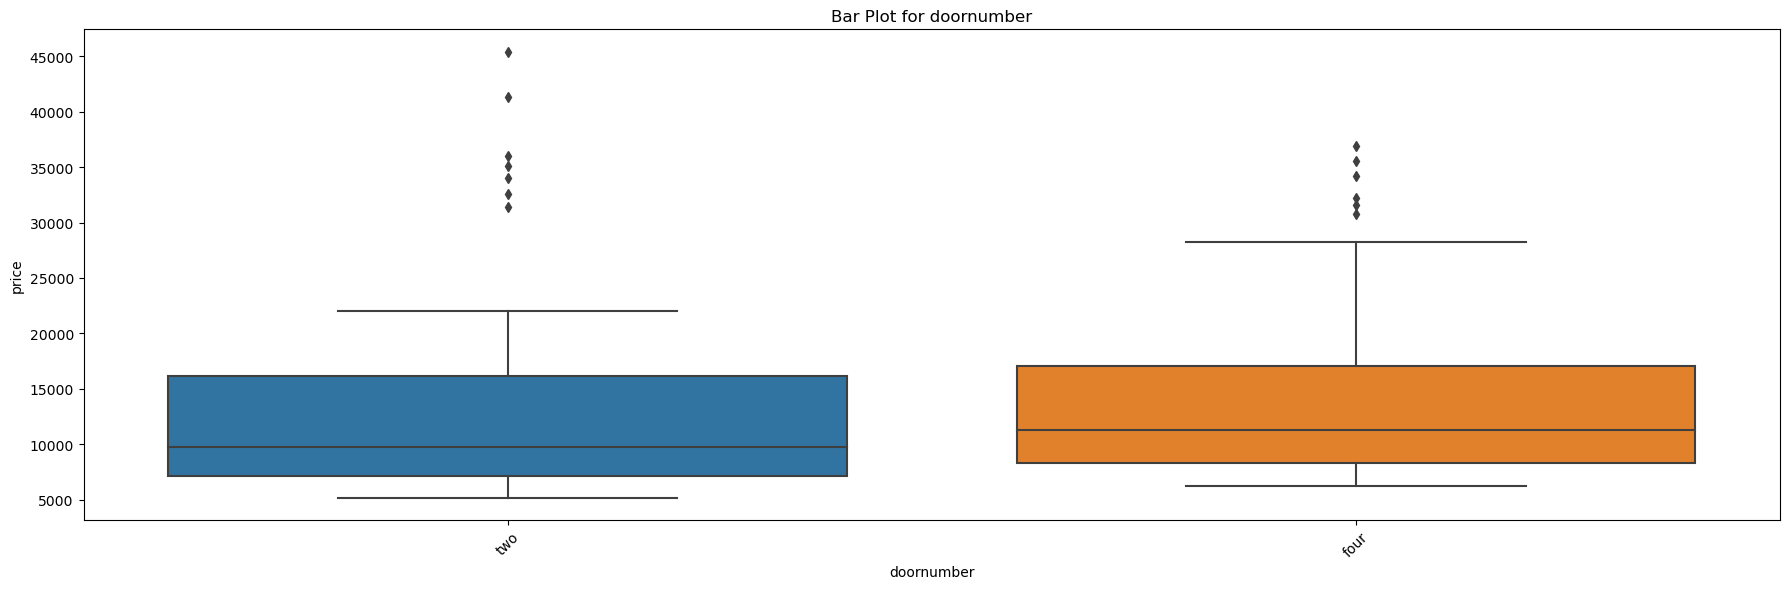

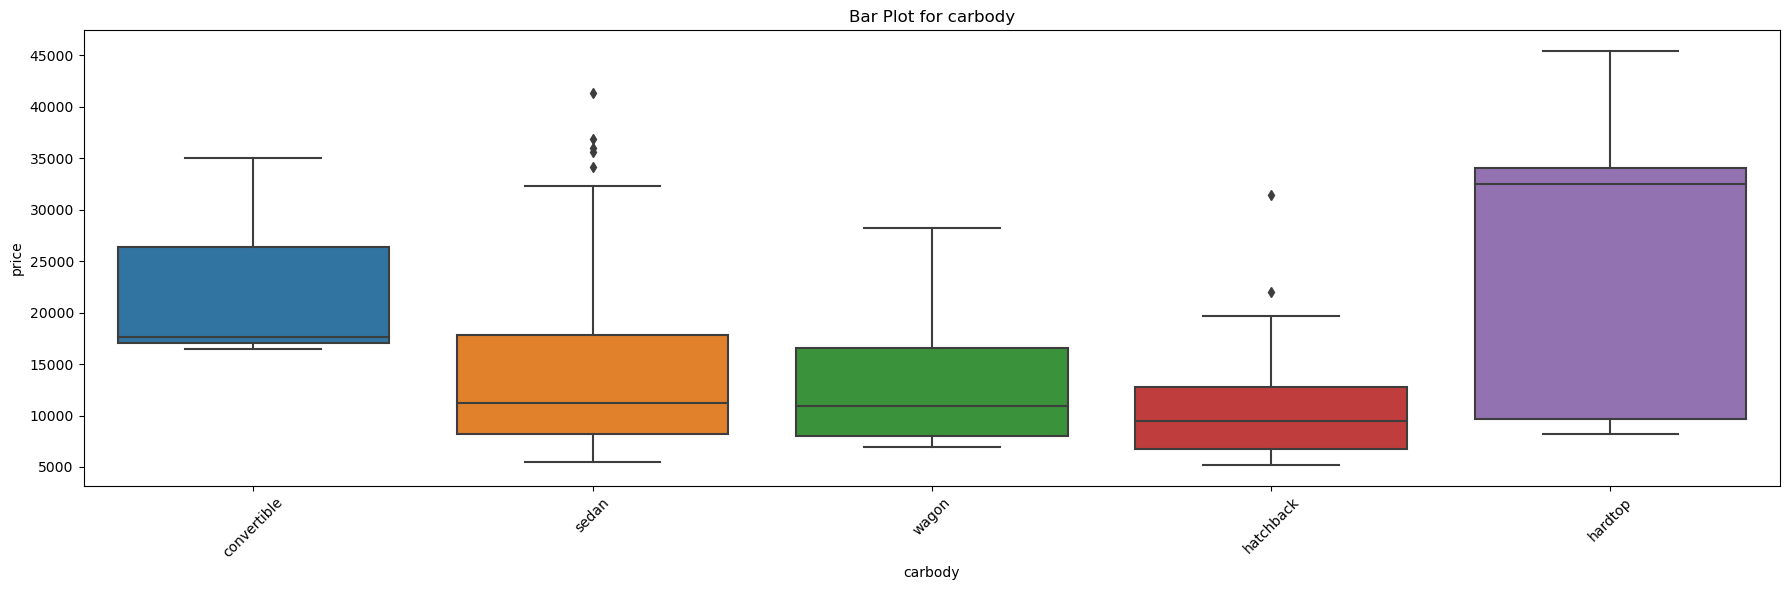

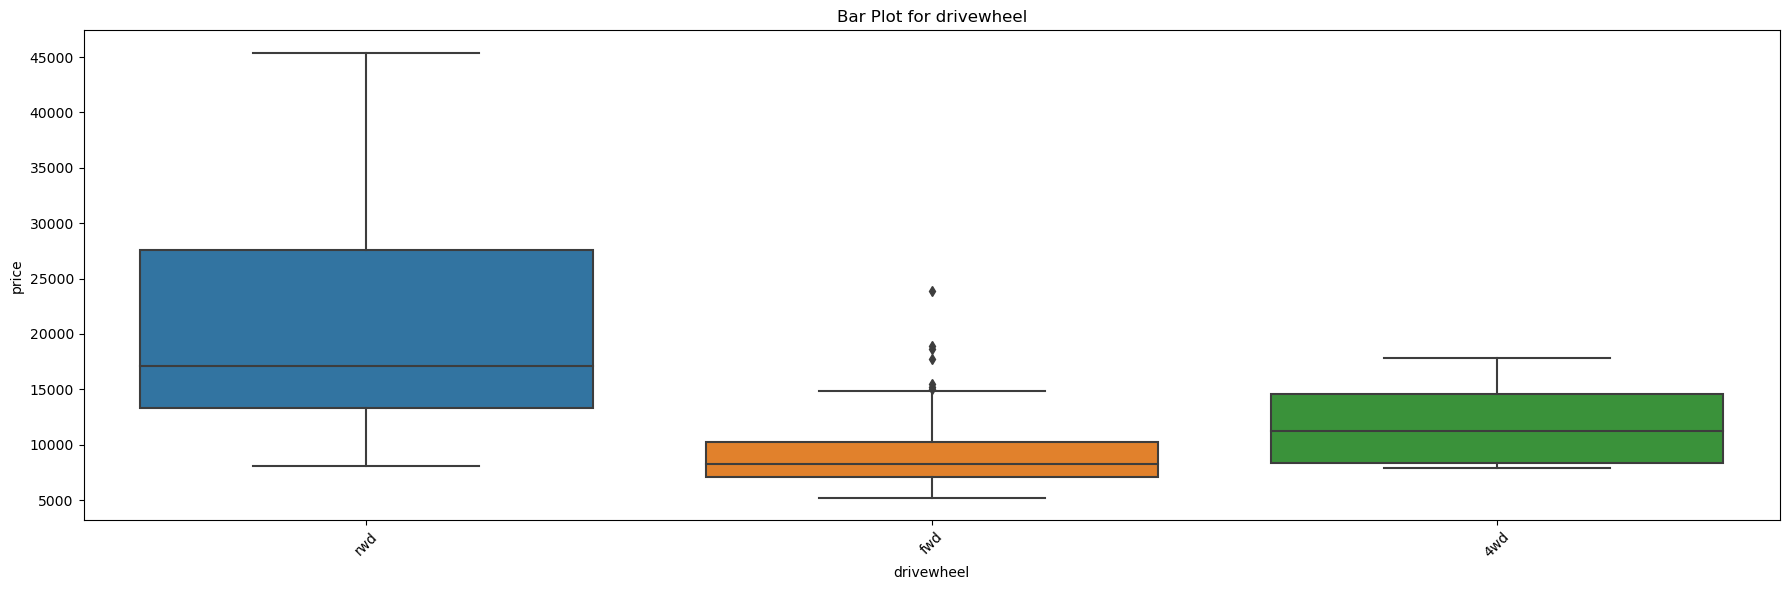

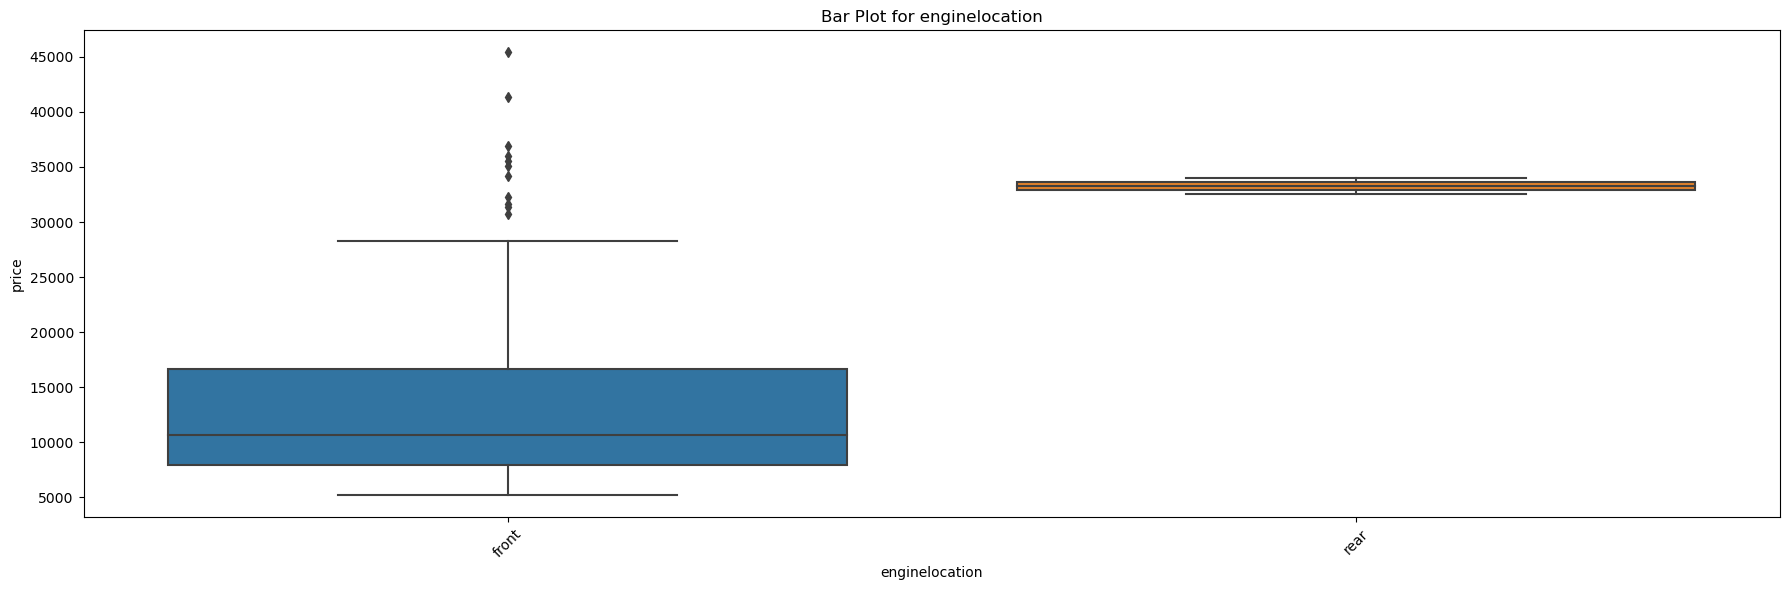

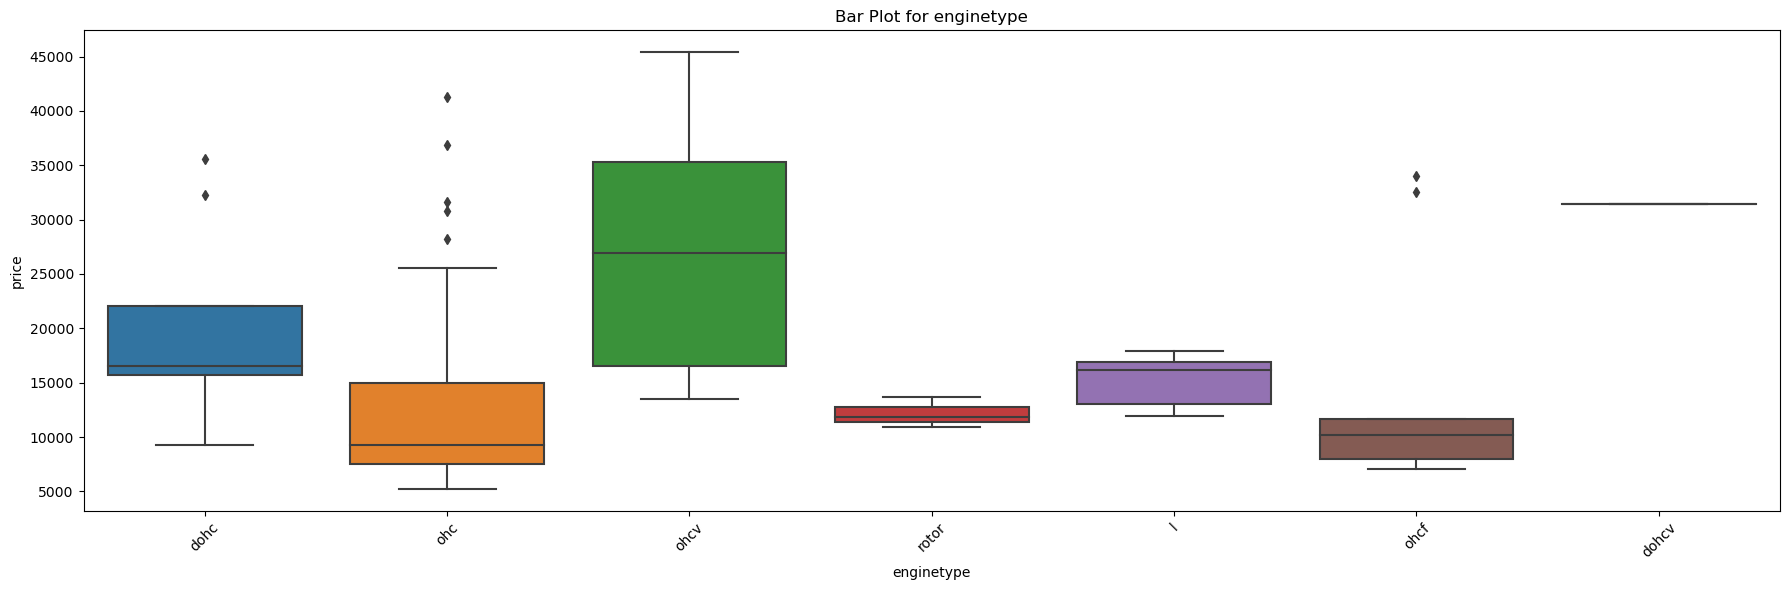

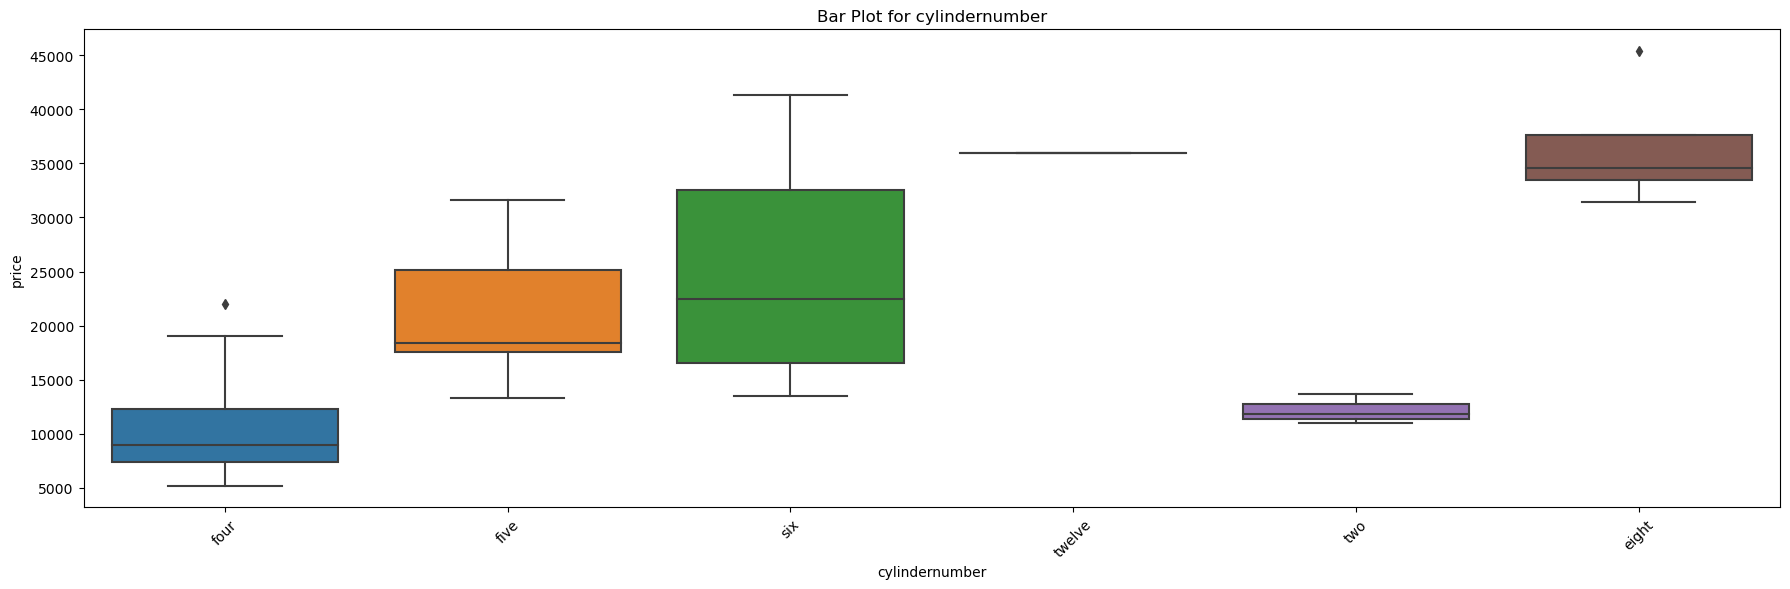

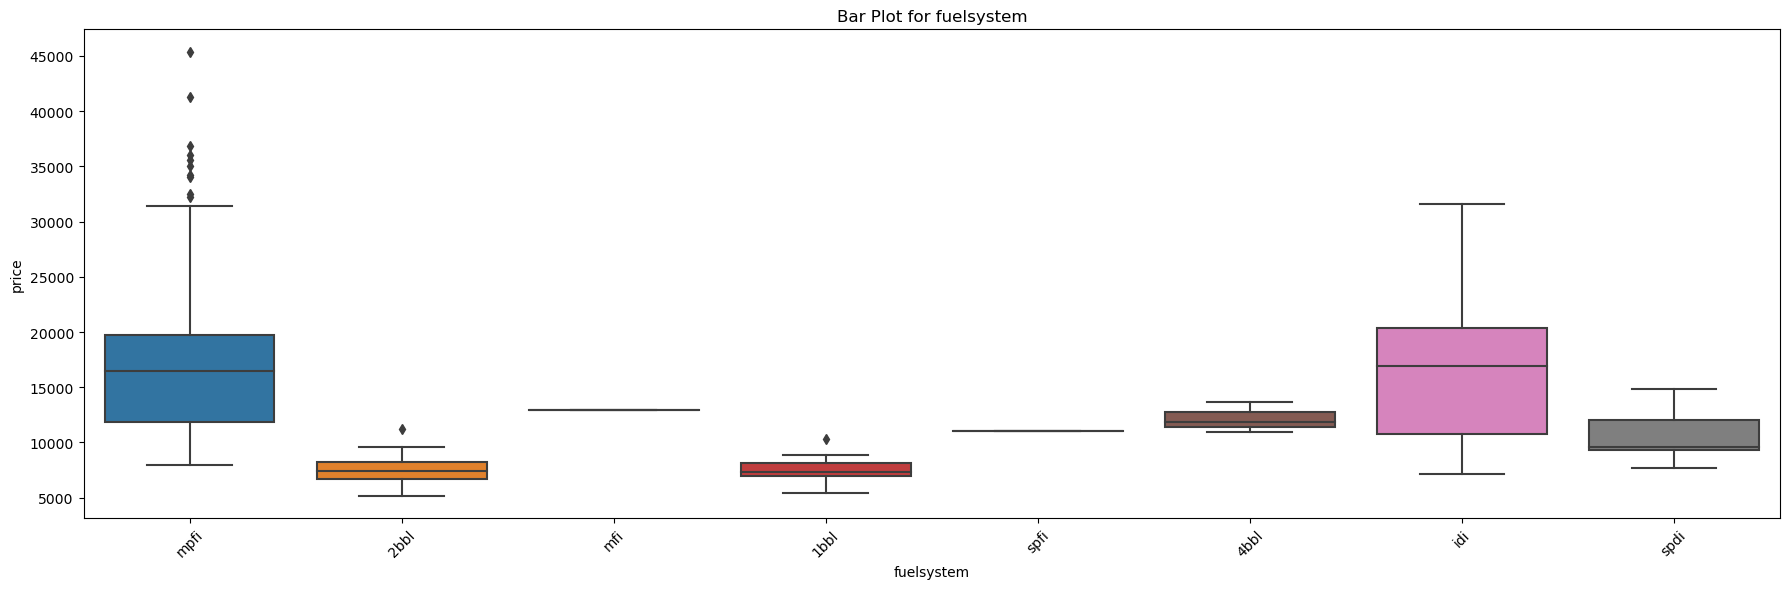

In [15]:
categorical_box_plot(train_data.to_pandas(),cat_cols,"price")

Some outliers present feature wise, they can be dropped or investigated in error analysis

**Performing Kruskal-Walli test (rank based) instead of ANOVA as data not following normal distribution**

In [16]:
perform_non_normal_kruskal_hypothesis(train_data,cat_cols,"price",alpha=0.05)

Kruskal-Wallis H-statistic: 4.641063240885674 P-value: 0.031215657007225634
There is a significant difference in price between different fueltype categories.

Kruskal-Wallis H-statistic: 13.472246140368902 P-value: 0.0002421182897620171
There is a significant difference in price between different aspiration categories.

Kruskal-Wallis H-statistic: 3.0173779823897773 P-value: 0.0823765534301663
There is no significant difference in price between different doornumber categories.

Kruskal-Wallis H-statistic: 14.741270074151037 P-value: 0.00526904954422455
There is a significant difference in price between different carbody categories.

Kruskal-Wallis H-statistic: 67.94961257484405 P-value: 1.757636673410337e-15
There is a significant difference in price between different drivewheel categories.

Kruskal-Wallis H-statistic: 4.766301855878229 P-value: 0.02902210276438481
There is a significant difference in price between different enginelocation categories.

Kruskal-Wallis H-statistic: 28.51

Dropping dorrnumber,fueltype

In [17]:
train_data=train_data.drop("doornumber")
test_data=test_data.drop("doornumber")
cat_cols.remove("doornumber")

train_data=train_data.drop("fueltype")  # near to 0.05
test_data=test_data.drop("fueltype")
cat_cols.remove("fueltype")

In [18]:
for i in cat_cols:
    print(train_data[i].value_counts())

shape: (2, 2)
┌────────────┬───────┐
│ aspiration ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ std        ┆ 115   │
│ turbo      ┆ 28    │
└────────────┴───────┘
shape: (5, 2)
┌─────────────┬───────┐
│ carbody     ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ sedan       ┆ 71    │
│ hatchback   ┆ 44    │
│ convertible ┆ 3     │
│ wagon       ┆ 20    │
│ hardtop     ┆ 5     │
└─────────────┴───────┘
shape: (3, 2)
┌────────────┬───────┐
│ drivewheel ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ 4wd        ┆ 7     │
│ rwd        ┆ 54    │
│ fwd        ┆ 82    │
└────────────┴───────┘
shape: (2, 2)
┌────────────────┬───────┐
│ enginelocation ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ rear           ┆ 2     │
│ front          ┆ 141   │
└────────────────┴───────┘
shape: (7, 2)
┌────────────┬───────┐
│ enginetype ┆ count │
│ ---        

Many columns with less value counts

In [19]:
train_data.filter((train_data['enginelocation']=="rear"))

car_ID,symboling,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carclass,brandavg
i64,i64,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64,f64,f64
127,3,"""std""","""hardtop""","""rwd""","""rear""",89.5,168.9,65.0,51.6,2756,"""ohcf""","""six""",194,"""mpfi""",3.74,2.9,9.5,207,5900,17,25,32528.0,3.0,31964.25
128,3,"""std""","""hardtop""","""rwd""","""rear""",89.5,168.9,65.0,51.6,2756,"""ohcf""","""six""",194,"""mpfi""",3.74,2.9,9.5,207,5900,17,25,34028.0,3.0,31964.25


Enginelocation has only 2 entries with different categories can cause problems in cross validation results as in some cases the entire feature will be constant.dropping it can increase performance. And they they are probably sports cars

In [20]:
train_data=train_data.filter(~(train_data['enginelocation']=="rear"))
test_data=test_data.filter(~(test_data['enginelocation']=="rear"))
train_data=train_data.drop("enginelocation")
test_data=test_data.drop("enginelocation")

cat_cols.remove("enginelocation")

### Manual Imputing Categories

some insights are from powerbi reports

In [21]:
train_data= train_data.filter(~(train_data['enginetype']=='dohcv')) # only one observation
train_data=train_data.with_columns(train_data["drivewheel"].str.replace_many(["4wd"],["fwd"]))
train_data=train_data.with_columns(train_data["drivewheel"].is_in(["rwd"]).cast(pl.Int64))
#imputing average prices from power bi
train_data=train_data.with_columns(train_data["cylindernumber"].str.replace_many(["three","four","two","five","six","eight","twelve"],["5","9","13","19","21","35",'36']).cast(pl.Int64))
train_data=train_data.with_columns(train_data["enginetype"].str.replace("dohcv","ohcv"))

test_data=test_data.with_columns(test_data["drivewheel"].str.replace_many(["4wd"],["fwd"]))
test_data=test_data.with_columns(test_data["drivewheel"].is_in(["rwd"]).cast(pl.Int64))
test_data=test_data.with_columns(test_data["cylindernumber"].str.replace_many(["three","four","two","five","six","eight","twelve"],["5","9","13","19","21","35",'36']).cast(pl.Int64))
test_data=test_data.with_columns(test_data["enginetype"].str.replace("dohcv","ohcv"))

cat_cols.remove("drivewheel")
cat_cols.remove("cylindernumber")
num_cols.append("drivewheel")
num_cols.append("cylindernumber")

### Numerical eda

In [22]:
train_data[num_cols]

symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carclass,brandavg,drivewheel,cylindernumber
i64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,2.0,16500.0,1,9
2,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,3.0,17710.0,0,9
2,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,3.0,17710.0,0,19
2,99.8,177.3,66.3,53.1,2507,136,3.19,3.4,8.5,110,5500,19,25,3.0,17710.0,0,19
1,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,3.0,17710.0,0,19
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-2,104.3,188.8,67.2,56.2,3045,130,3.62,3.15,7.5,162,5100,17,22,3.0,18420.0,1,9
-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,3.0,18420.0,1,9
-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,3.0,18420.0,1,9


Univariate Analysis

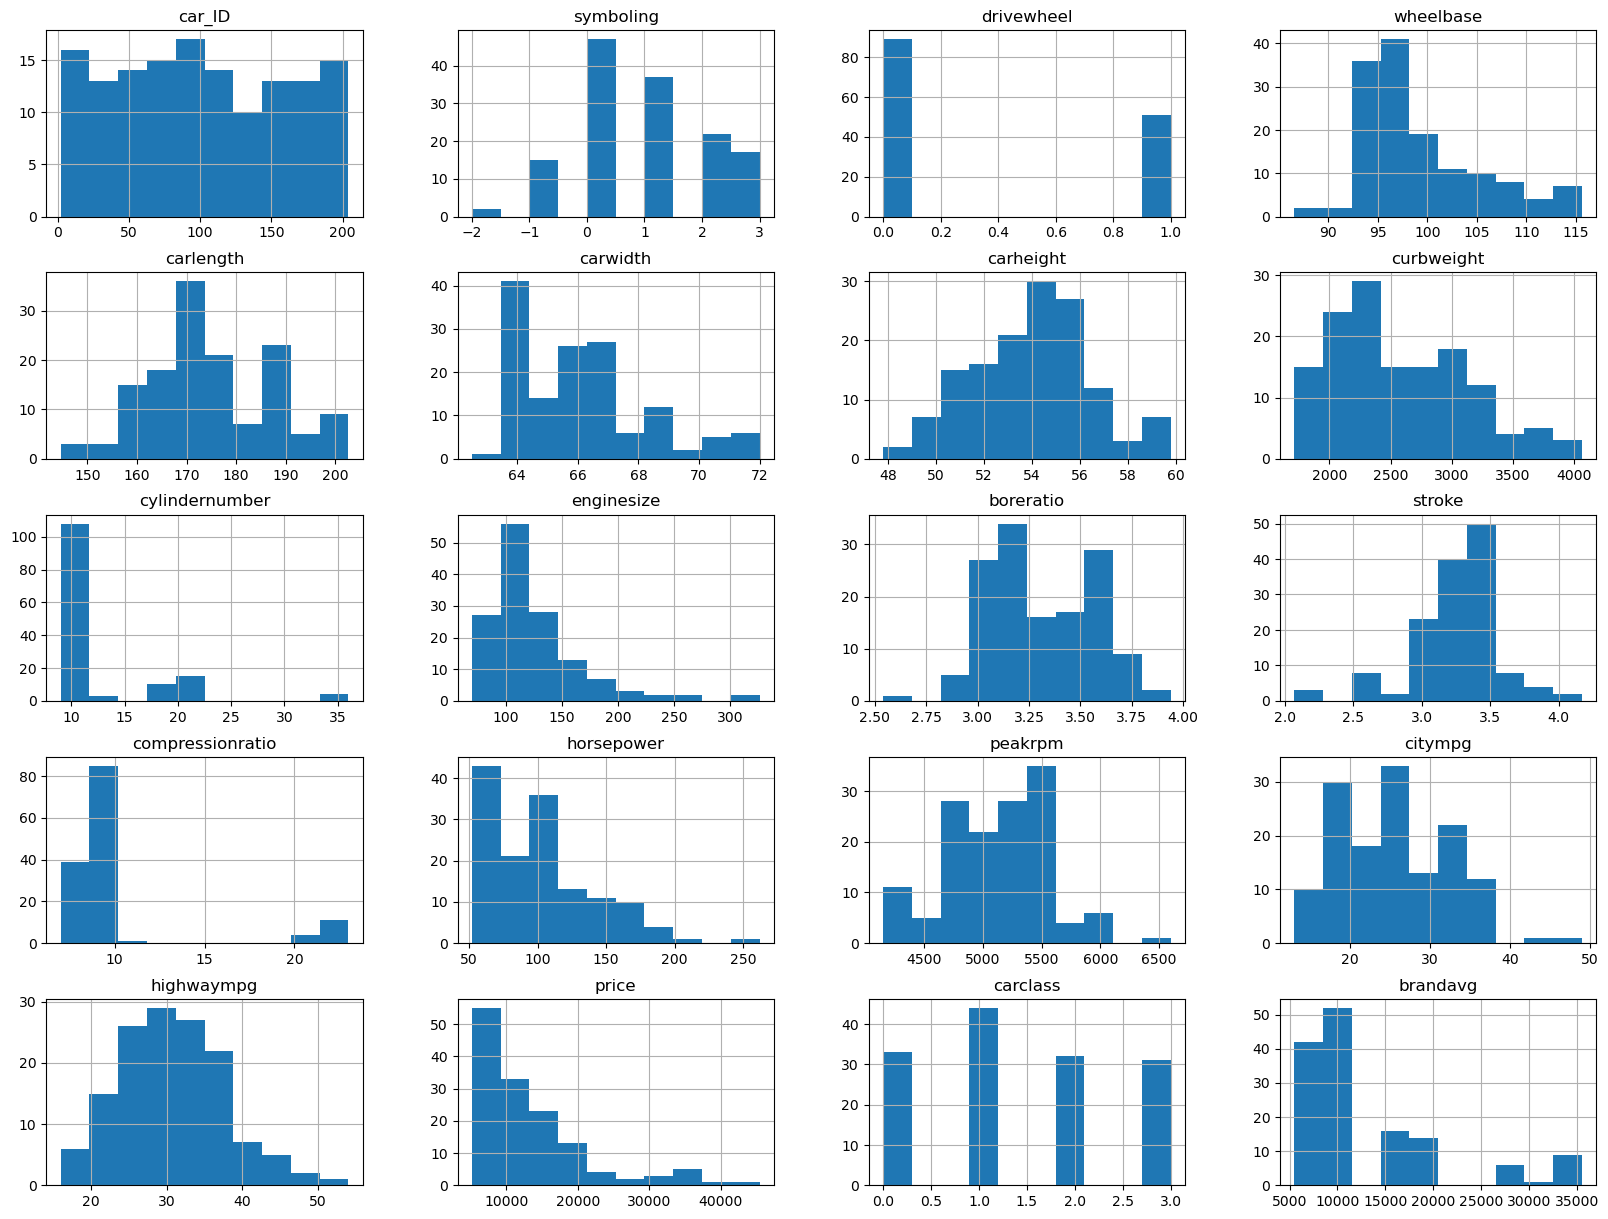

In [23]:
train_data.to_pandas().hist(bins=10,figsize=(20,15))
plt.show()

Most continuous features are roughly Normal, some are Right skewed including the dependent variable "Price"

Bivariate Analysis

<Axes: >

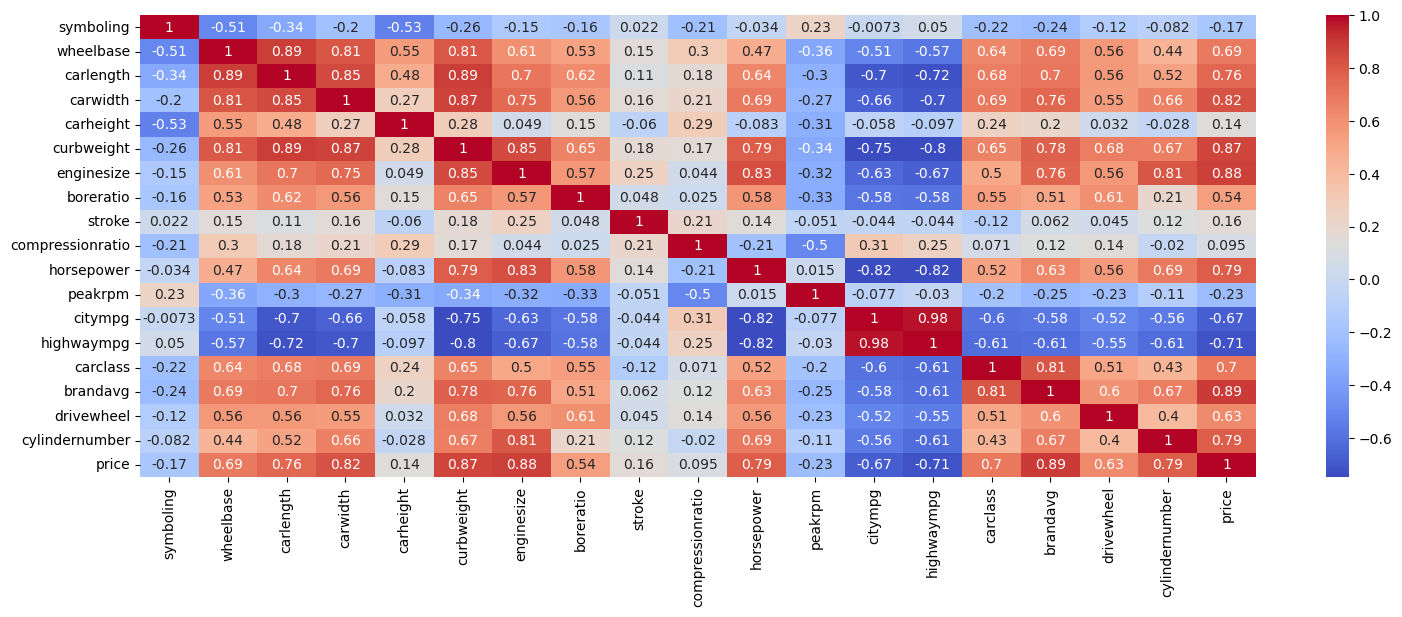

In [24]:
plt.figure(figsize=(18,6))
sns.heatmap(train_data[num_cols+["price"]].to_pandas().corr(),annot=True,cmap="coolwarm",robust=True)

Lot of Multi collinear features exists

Will deal with these multi collinear features based on modeling results

In [25]:
cat_cols=[col for col in train_data.columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("car_ID","price").columns if train_data[col].dtype!= pl.String]

## Feature Engineering

In this section, we describe the feature engineering steps applied to the car dataset. The following new features have been created with the help of Chatgpt's domain knowldege to enhance the predictive power of our model:

### 1. Car Space
The `carspace` feature represents the overall space of the car, calculated using the product of car length, car width, and wheelbase.

$$
\text{carspace} = \text{carlength} \times \text{carwidth} \times \text{wheelbase}
$$

### 2. Average MPG
The `averagempg` feature provides a balanced measure of fuel efficiency, combining city and highway miles per gallon (MPG) using weighted averages.
US Environmental Protection Agency (EPA) uses a standard weighting of 55% city and 45% highway to calculate a combined fuel economy rating for vehicles https://www.epa.gov/fueleconomy

$$
\text{averagempg} = \frac{1}{\frac{0.55}{\text{citympg}} + \frac{0.45}{\text{highwaympg}}}
$$

### 3. Performance Balance
The `performancebalance` feature integrates engine size, horsepower, curb weight, and fuel efficiency, adjusted by peak RPM. It aims to capture a balance between power and efficiency.

$$
\text{performancebalance} = \frac{\text{enginesize} \times \text{horsepower} \times \text{curbweight} \times \text{averagempg}}{\text{peakrpm}}
$$

### 4. Engine Displacement
The `displacement` feature calculates the engine's total displacement volume, incorporating the bore, stroke, and number of cylinders.

$$
\text{displacement} = \pi \times \left(\frac{\text{bore}}{2}\right)^2 \times \text{stroke} \times \text{numberofcylinders}
$$

In [26]:
train_data=train_data.with_columns(((train_data['carlength']*train_data['carwidth']*train_data["wheelbase"])).alias("carspace")).drop("carlength", "carwidth","wheelbase")
train_data=train_data.with_columns((1/((0.55/train_data['citympg'])+(0.45/train_data['highwaympg']))).alias("averagempg")).drop("citympg",'highwaympg')
train_data=train_data.with_columns(((train_data["enginesize"]*train_data['horsepower']*train_data["curbweight"]*train_data["averagempg"]/train_data['peakrpm'])).alias("performancebalance")).drop("peakrpm","horsepower","enginesize","curbweight")
train_data=train_data.with_columns((np.pi*(train_data['boreratio']*train_data["stroke"]/2).pow(2)*train_data['stroke']*train_data['cylindernumber']).alias("enginedisplacement")).drop("stroke","boreratio","cylindernumber")

test_data=test_data.with_columns(((test_data['carlength']*test_data['carwidth']*test_data["wheelbase"])).alias("carspace")).drop("carlength", "carwidth","wheelbase")
test_data=test_data.with_columns((1/((0.55/test_data['citympg'])+(0.45/test_data['highwaympg']))).alias("averagempg")).drop("citympg",'highwaympg')
test_data=test_data.with_columns(((test_data["enginesize"]*test_data['horsepower']*test_data["curbweight"]*test_data["averagempg"]/test_data['peakrpm'])).alias("performancebalance")).drop("peakrpm","horsepower","enginesize","curbweight")
test_data=test_data.with_columns((np.pi*(test_data['boreratio']*test_data["stroke"]/2).pow(2)*test_data['stroke']*test_data['cylindernumber']).alias("enginedisplacement")).drop("stroke","boreratio","cylindernumber")

num_cols=[col for col in train_data.drop("car_ID","price").columns if train_data[col].dtype!= pl.String]

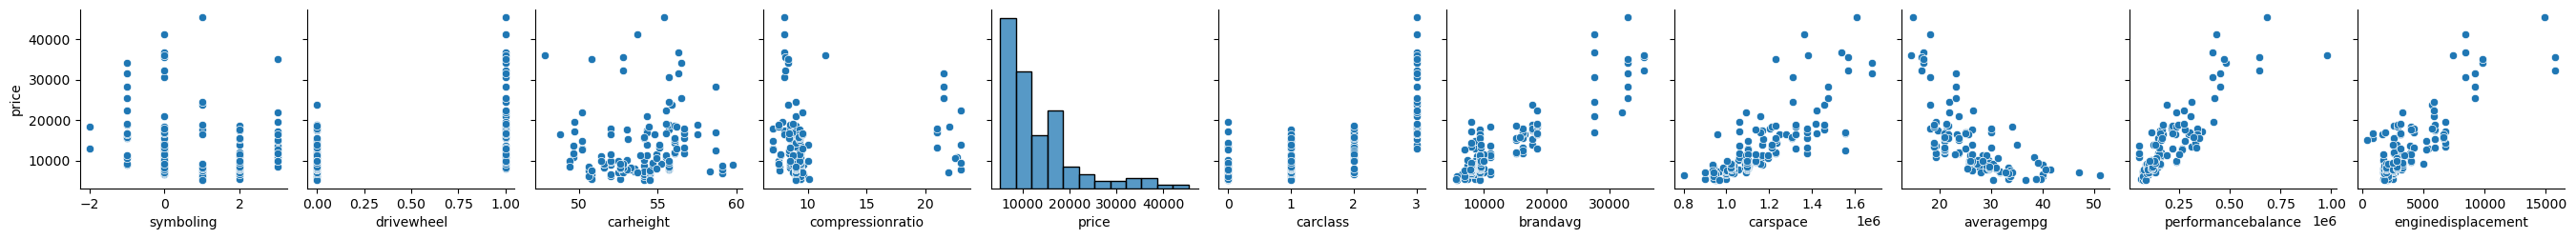

In [27]:
sns.pairplot(data=train_data.drop("car_ID").to_pandas(),y_vars="price")

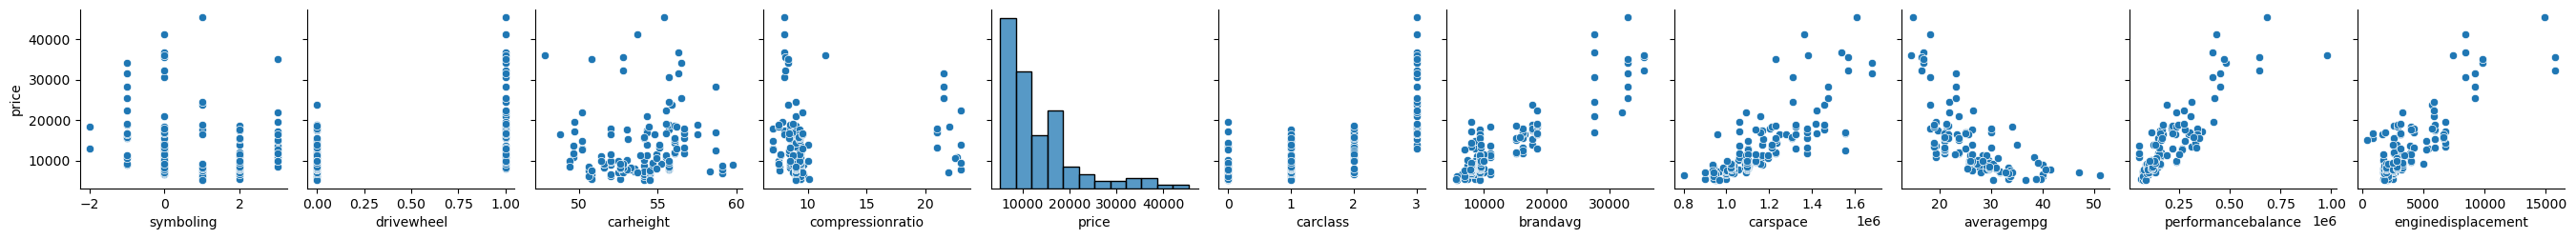

In [28]:
sns.pairplot(data=train_data.drop("car_ID").to_pandas(),y_vars="price")

Having more domain knowledge may even make use of these remaining features like compression ratio,enginetype etc

### variance Inflation factor checking

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

df = sm.add_constant(train_data[num_cols].to_pandas())
calculate_vif(df).sort_values(by='VIF',ascending=False)

,variables,VIF
0,const,997.594936
6,brandavg,7.058109
7,carspace,6.674048
9,performancebalance,5.388595
5,carclass,4.722919
10,enginedisplacement,4.253831
8,averagempg,4.227431
3,carheight,2.325545
2,drivewheel,2.048608
4,compressionratio,1.900736


### Feature selection by correlation

In [30]:
train_data[num_cols+["price"]].to_pandas().corr()['price'].sort_values(ascending=False)

price                 1.000000
brandavg              0.893658
performancebalance    0.870402
enginedisplacement    0.828696
carspace              0.785910
carclass              0.696099
drivewheel            0.625195
carheight             0.135746
compressionratio      0.095268
symboling            -0.169990
averagempg           -0.693507
Name: price, dtype: float64

dropping low correlated features

In [31]:
train_data=train_data.drop("drivewheel","carheight","compressionratio","symboling")
test_data=test_data.drop("drivewheel","carheight","compressionratio","symboling")
#engine location very few observations so not dropping
num_cols=[col for col in train_data.drop("car_ID","price").columns if train_data[col].dtype!= pl.String]

## Regularization

In [32]:
cat_cols=[col for col in train_data.columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("car_ID","price").columns if train_data[col].dtype!= pl.String]

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder,StandardScaler
imputer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='first',min_frequency=9), cat_cols),
    ('num', StandardScaler(), num_cols)
],remainder="passthrough")

ridge performed better from week 1 analysis

### Ridge Regression

Mean Train Score: 0.9139357791236549
Standard Deviation of Train Scores: 0.006019816068025225
Mean Test Score: 0.872765505921604
Standard Deviation of Test Scores: 0.08498779603482676
Mean absolute Error: 1827.2509048028367
R-squared on holdout set: 0.8530279167004052
Adjusted R-squared on holdout set: 0.8236335000404863


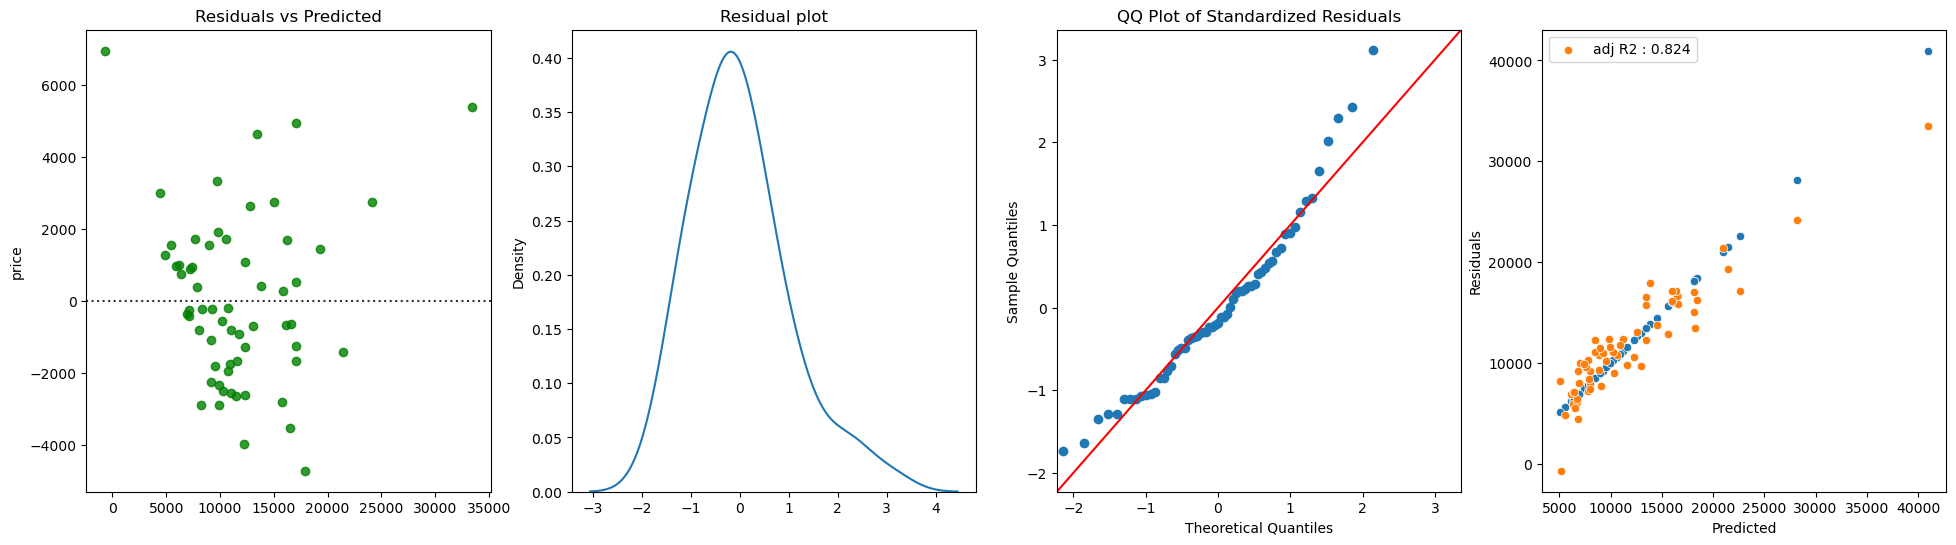

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict,cross_val_score,RepeatedKFold,cross_validate
from sklearn.metrics import mean_absolute_error,r2_score
from skopt import BayesSearchCV
import statsmodels.api as sm

X_train=train_data.drop('price',"car_ID").to_pandas()
y_train=train_data['price'].to_pandas()
X_test=test_data.drop('price',"car_ID").to_pandas()
y_test=test_data['price'].to_pandas()

ridge_pipe = Pipeline(steps=[
    ('imputer', imputer),
    ("regressor",Ridge())
])

rkf=RepeatedKFold(n_splits=10,random_state=42)
param_space = {
    'regressor__alpha': (1e-3, 1e3, 'log-uniform'),
}
ridge_bayes_search = BayesSearchCV(estimator=ridge_pipe, search_spaces=param_space, n_iter=50, cv=rkf, n_jobs=-1, random_state=42)
ridge_bayes_search.fit(X_train, y_train)

best_alpha = ridge_bayes_search.best_params_['regressor__alpha']

ridge_pipe.set_params(regressor__alpha=best_alpha)
ridge_pipe.fit(X_train, y_train)

cv_results = cross_validate(ridge_pipe, X_train,y_train, cv=rkf, scoring='r2',n_jobs=-1,return_train_score=True)
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

sc=StandardScaler()
predictions = cross_val_predict(ridge_pipe, X_test, y_test,n_jobs=-1)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
plt.show()

In [35]:
ridge_bayes_search.best_params_

OrderedDict([('regressor__alpha', 13.886444710498719)])

## Error Analysis
- This part delves into error analysis to gain insights into the nature and distribution of errors in our regression model.

### Extracting and Analyzing the residuals from previous modeling

Mean absolute Error: 1827.2509048028362
R-squared on holdout set: 0.8530279167004052
Adjusted R-squared on holdout set: 0.8236335000404863


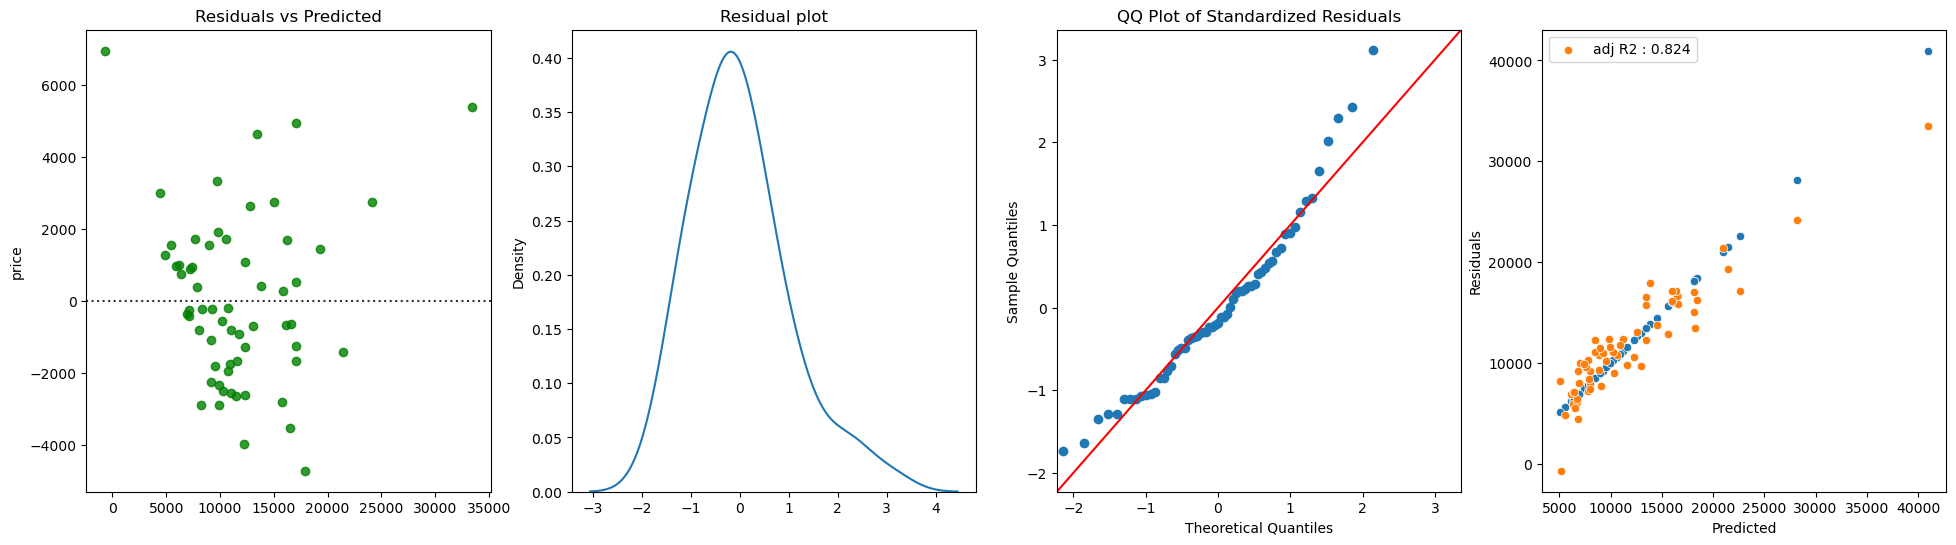

In [36]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

sc=StandardScaler()
predictions = cross_val_predict(ridge_pipe, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
plt.show()

In [37]:
outliers=np.where(np.std(residuals)*1.7<residuals)[0]
test_data[outliers].hstack(pl.DataFrame(predictions,schema=["predictions"])[outliers])

car_ID,aspiration,carbody,enginetype,fuelsystem,price,carclass,brandavg,carspace,averagempg,performancebalance,enginedisplacement,predictions
i64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
19,"""std""","""hatchback""","""l""","""2bbl""",5151.0,0.0,6435.0,752136.372,49.522863,42306.740826,925.068194,-708.520403
66,"""std""","""sedan""","""ohc""","""mpfi""",18280.0,2.0,10945.0,1.2134e6,21.923077,196676.307692,3153.329317,13410.824743
74,"""std""","""sedan""","""ohcv""","""mpfi""",40960.0,3.0,32892.0,1.8039e6,14.834437,728604.256071,14923.116866,33463.575834
205,"""turbo""","""sedan""","""ohc""","""mpfi""",22625.0,3.0,18420.0,1.4192e6,21.300448,194144.073244,3156.804245,17089.937428


- 1 obeservation deviating a lot it can porbably a outlier
- car with low price predicted as -ve

### Testing

#### Shapiro-Wilk Test: 
- Used to test the normality of the residuals. If the p-value is less than 0.05, the null hypothesis that the data is normally distributed is rejected.

In [38]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk test: Statistic=0.9526605606079102, p-value=0.019328922033309937


#### Failed
- Residuals are not normally distributed

#### Breusch-Pagan Test: 
- Tests for homoscedasticity (constant variance of the residuals). If the p-value is less than 0.05, the null hypothesis of homoscedasticity is rejected.

In [39]:
X_test_transformed = imputer.fit_transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=imputer.get_feature_names_out())
# # Add a constant (intercept term)
X_test_transformed = sm.add_constant(X_test_transformed)

In [40]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_test_transformed)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 27.921779771388426, 'p-value': 0.005679652100190708, 'f-value': 3.3764549094134164, 'f p-value': 0.0012827932544598579}


#### Failed  
- Heteroskedastic residuals present

Logging some features could decrease the Heteroscedastic residuals little bit

#### Durbin-Watson Test: 
- Tests for autocorrelation in the residuals. Values close to 2 indicate no autocorrelation, while values deviating significantly from 2 suggest positive or negative autocorrelation.

In [41]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation
dw_test = durbin_watson(residuals)
print(f"Durbin-Watson test statistic: {dw_test}")

Durbin-Watson test statistic: 1.5123369697848166


#### Failed
- Some Positive autocorrelation present

#### Multi-collinearity test

In [42]:
def condition_index(X):
  if not np.all(X.shape[1] >= 2):
    raise ValueError("Input matrix must have at least two columns.")
  return np.linalg.cond(X)

condition_number = condition_index(imputer.transform(X_train))
print(f"Condition number: {condition_number:.4f}")

Condition number: 10.3296


#### Passed
- very less multicollinearity

### Solutions
- There might be omitted features which could capture heteroskedacity
- Function form of features (ex: feature engineered ones) would be wrong (for heteroskedastic residuals) also
- Transforming the target variable (Right skewed) . Interpretation will not be straight forward

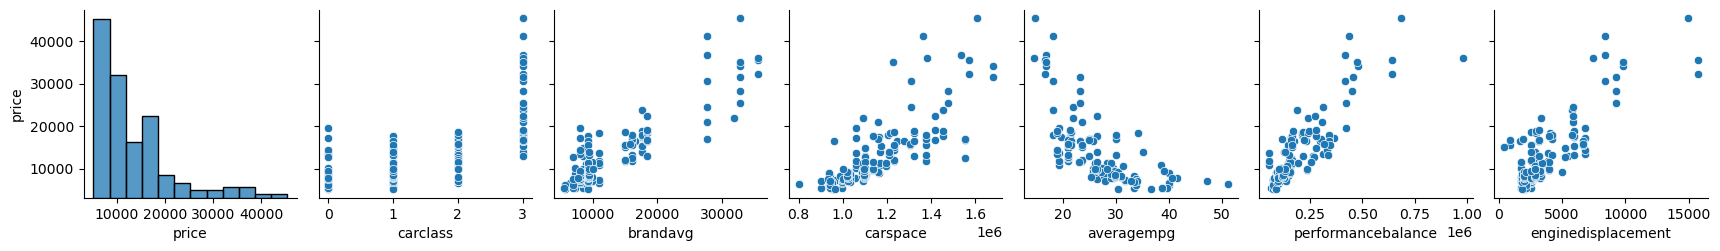

In [43]:
sns.pairplot(train_data.drop("car_ID").to_pandas(),y_vars='price')

### Adding the ommited features

In [44]:
data=pl.read_csv("./data/W1_carPrices/CarPrice_Assignment.csv")
train_data=train_data.join(data[["car_ID","horsepower"]],on="car_ID") # remaining features didn't captured autocorrelation well
test_data=test_data.join(data[["car_ID","horsepower"]],on="car_ID")

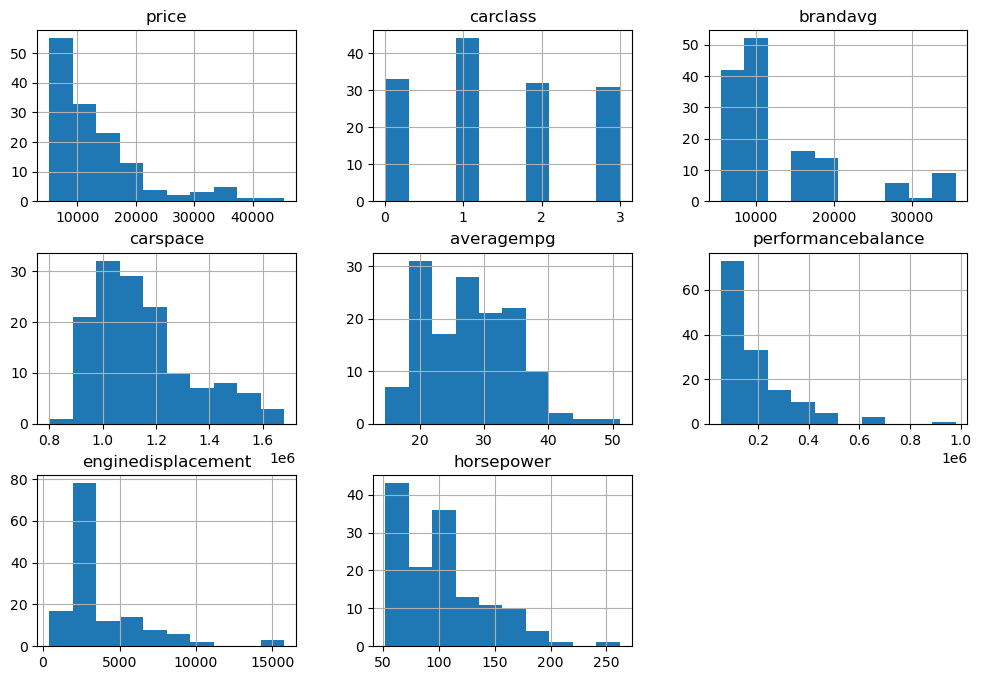

In [45]:
train_data.drop("car_ID").to_pandas().hist(figsize=(12,8))
plt.show()

### Enhancing the distribution of new features close to Normal

In [46]:
# train_data=train_data.with_columns(train_data['curbweight'].log10())
# test_data=test_data.with_columns(test_data['curbweight'].log10())

train_data=train_data.with_columns(train_data['performancebalance'].log10())
test_data=test_data.with_columns(test_data['performancebalance'].log10())

train_data=train_data.with_columns(train_data['enginedisplacement'].log10())
test_data=test_data.with_columns(test_data['enginedisplacement'].log10())

### Transforming Target variable

In [47]:
train_data=train_data.with_columns(train_data['price'].log10())
test_data=test_data.with_columns(test_data['price'].log10())

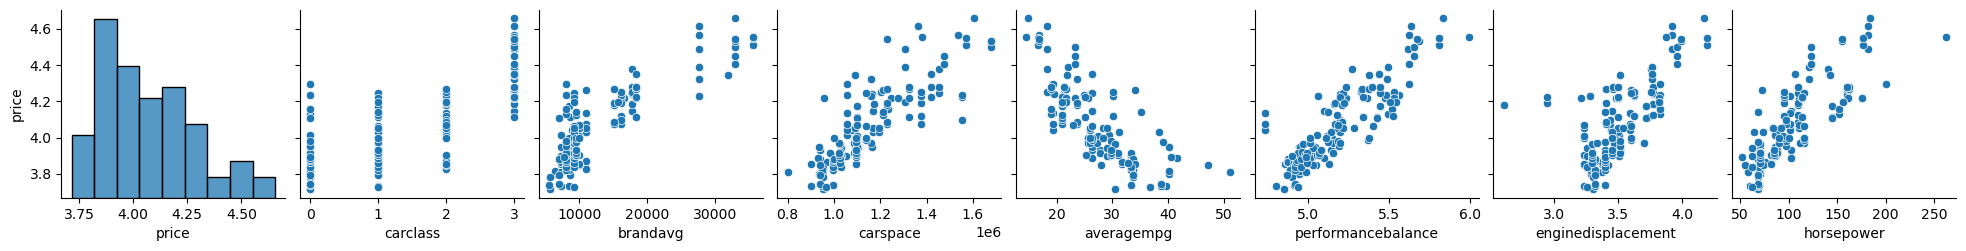

In [48]:
sns.pairplot(train_data.drop("car_ID").to_pandas(),y_vars='price')

### Removing high inflential points

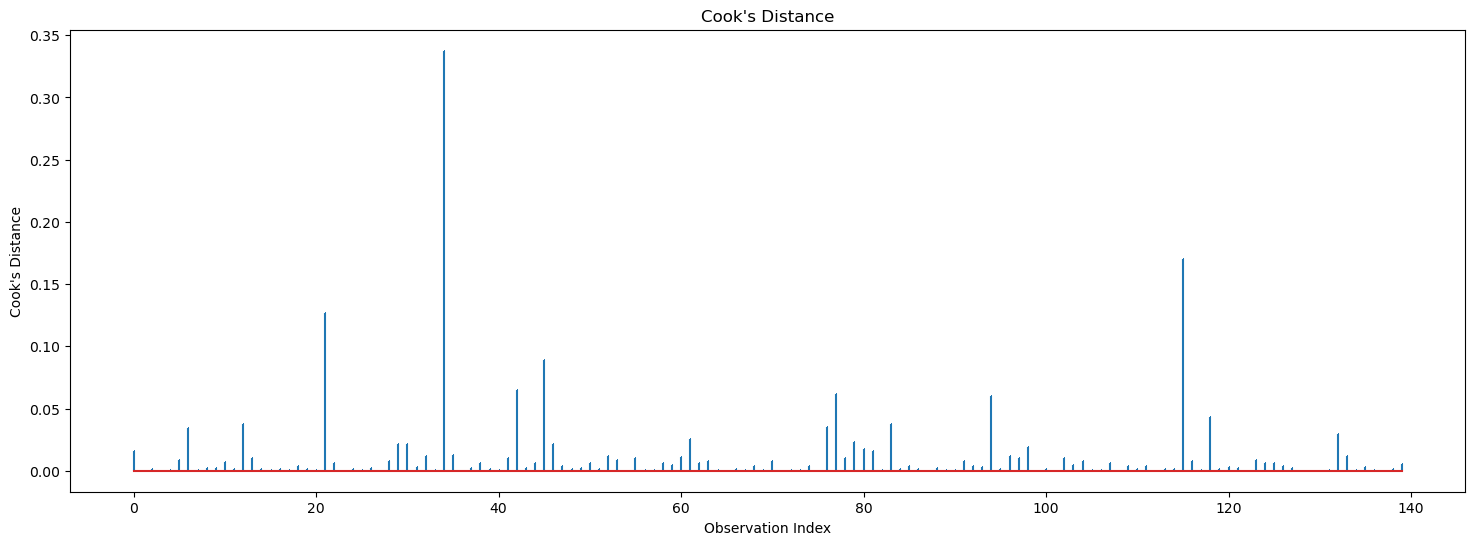

Influential Points: [ 21  34 115]


In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the dependent and independent variables
X = train_data.drop("price","car_ID").to_pandas()
y = train_data["price"].to_pandas()
cat_cols=[col for col in train_data.columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("car_ID","price").columns if train_data[col].dtype!= pl.String]
imputer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='first',min_frequency=9), cat_cols),
    ('num', StandardScaler(), num_cols)
],remainder="passthrough")
X=imputer.fit_transform(X)
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get influence metrics
influence = model.get_influence()

# Calculate Cook's distance
cooks_d = influence.cooks_distance

# Plot Cook's distance
plt.figure(figsize=(18, 6))
plt.stem(np.arange(len(cooks_d[0])), cooks_d[0], markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()
n_samples = len(y)
influential_points = np.where(cooks_d[0] > 0.1)[0]  # Arbitary
print("Influential Points:", influential_points)

In [50]:
train_data=train_data.filter(~(train_data["car_ID"].is_in(train_data[influential_points]["car_ID"])))

Having domain knowledge may tune these new features well and know what other features are crucial for car price

Mean Train Score: 0.9419609141505589
Standard Deviation of Train Scores: 0.0036442339539395547
Mean Test Score: 0.9027553922236509
Standard Deviation of Test Scores: 0.06379302458036953
Mean absolute Error: 0.05010036845323279
R-squared on holdout set: 0.8861003561280104
Adjusted R-squared on holdout set: 0.8605310483200127


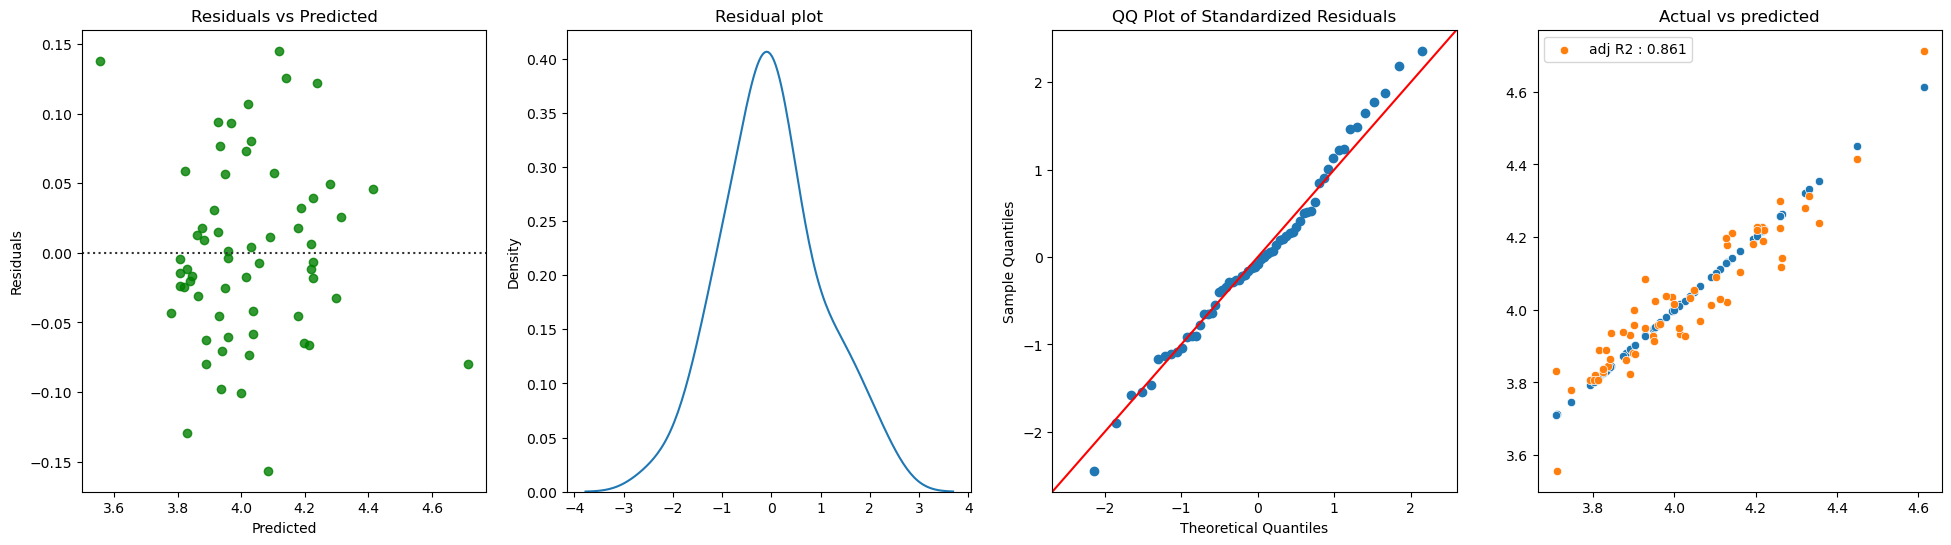

In [51]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import cross_val_predict,cross_validate,RepeatedKFold
from sklearn.metrics import mean_absolute_error,r2_score
import statsmodels.api as sm
from skopt import BayesSearchCV
from skopt.space import Real

X_train=train_data.drop('price',"car_ID").to_pandas()
y_train=train_data['price'].to_pandas()
X_test=test_data.drop('price',"car_ID").to_pandas()
y_test=test_data['price'].to_pandas()
cat_cols=[col for col in train_data.columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("car_ID","price").columns if train_data[col].dtype!= pl.String]
imputer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='first',min_frequency=9), cat_cols),
    ('num', StandardScaler(), num_cols)
],remainder="passthrough")

ridge_pipe = Pipeline([
    ('imputer', imputer),
    ('regressor', Ridge())
])
param_space = {
    'regressor__alpha': Real(1e-4, 1e3, prior='log-uniform'),
    # 'regressor__l1_ratio': Real(0, 1)
}
rkf=RepeatedKFold(n_splits=10,random_state=42)
# Initialize the Bayesian search
bayes_search = BayesSearchCV(estimator=ridge_pipe, search_spaces=param_space, n_iter=25, cv=rkf, n_jobs=-1, random_state=42)

# Fit the search
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = bayes_search.best_params_['regressor__alpha']
# best_l1_ratio = bayes_search.best_params_['regressor__l1_ratio']

# Set the best hyperparameters to the pipeline
ridge_pipe.set_params(regressor__alpha=best_alpha)
ridge_pipe.fit(X_train, y_train)

cv_results = cross_validate(ridge_pipe, X_train,y_train, cv=rkf, scoring='r2',n_jobs=-1,return_train_score=True)
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

sc=StandardScaler()
predictions = cross_val_predict(ridge_pipe, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
ax4.set_title("Actual vs predicted")
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.show()

In [52]:
bayes_search.best_params_

OrderedDict([('regressor__alpha', 0.3038353324220742)])

Mean absoulte error on original scale

In [53]:
predictions = cross_val_predict(ridge_pipe, X_test, y_test)
residuals = y_test - predictions
# Sample data (assuming y_test and predictions are in log10 scale)
y_test_transformed = y_test
predictions_transformed = predictions

# Convert predictions back to original scale
y_test_original = 10**y_test_transformed
predictions_original = 10**predictions_transformed

# Calculate the absolute error in the original scale
abs_error_original = np.abs(y_test_original - predictions_original)

# Calculate mean absolute error in the original scale
mae_original = np.mean(abs_error_original)

print("Mean Absolute Error in Original Scale:", mae_original)

Mean Absolute Error in Original Scale: 1419.671537043783


### Testing After Changes

In [54]:
# Durbin-Watson test for autocorrelation
dw_test = durbin_watson(residuals)
print(f"Durbin-Watson test statistic: {dw_test}")
# Residuals Normailty check
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
# Breusch-Pagan test for Homoscedastic residuals
bp_test = het_breuschpagan(residuals, X_test_transformed)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))
# Multi-collinearity
def condition_index(X):
  if not np.all(X.shape[1] >= 2):
    raise ValueError("Input matrix must have at least two columns.")
  return np.linalg.cond(X)

condition_number = condition_index(imputer.transform(X_train))
print(f"Condition number: {condition_number:.4f}")

Durbin-Watson test statistic: 1.7806956330074533
Shapiro-Wilk test: Statistic=0.987564206123352, p-value=0.7928335666656494
{'Lagrange multiplier statistic': 13.88030032991703, 'p-value': 0.308417352650401, 'f-value': 1.178301256340974, 'f p-value': 0.32512891687155865}
Condition number: 16.4192


- Autocorrelation decreased little
- Residuals are more likely to follow Normal distribution (Some Outliers may present in hold-out Set)
- Strongly Homoscedastic residuals
- No multi-collinearity (little bit increased)

## Ensembling
- This part focuses on Ensembling techniques to improve model Stability.

In [55]:
train_data=train_data.to_pandas()
test_data=test_data.to_pandas()

### Pipeline Building

In [56]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.model_selection import cross_val_predict,cross_validate,RepeatedKFold
from sklearn.metrics import mean_absolute_error,r2_score
import statsmodels.api as sm
from sklearn.ensemble import BaggingRegressor

X_train=train_data.drop(columns=['price',"car_ID"])
y_train=train_data['price']
X_test=test_data.drop(columns=['price',"car_ID"])
y_test=test_data['price']

def to_dataframe(X):
    if isinstance(X, np.ndarray):
        return pd.DataFrame(X, columns=cat_cols + num_cols)
    return X

cat_cols=[col for col in train_data.columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop(columns=["car_ID","price"]).columns if train_data[col].dtype!= pl.String]

imputer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='first',min_frequency=9), cat_cols),
    ('num', StandardScaler(), num_cols)
],remainder="passthrough")

ridge_pipe = Pipeline([
    ('to_dataframe', FunctionTransformer(to_dataframe)),
    ('imputer', imputer),
    ("ridge",Ridge(alpha=0.505))
])
ridge_pipe

Pipeline(steps=[('to_dataframe',
                 FunctionTransformer(func=<function to_dataframe at 0x00000184A48213A0>)),
                ('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                min_frequency=9),
                                                  ['aspiration', 'carbody',
                                                   'enginetype',
                                                   'fuelsystem']),
                                                 ('num', StandardScaler(),
                                                  ['carclass', 'brandavg',
                                                   'carspace', 'averagempg',
                                                   'performancebalance',
                                                   'enginedisplacement',
                                                   'horsepower'])])),
                ('ridge', Ridge(alpha=0.505))])

### Bagging

Mean Train Score: 0.9418108996688105
Standard Deviation of Train Scores: 0.0036648635847120496
Mean Test Score: 0.9009981232076515
Standard Deviation of Test Scores: 0.06609601239219469
Mean absolute Error: 0.05125123825370302
R-squared on holdout set: 0.8773444957257776
Adjusted R-squared on holdout set: 0.8498095866029929


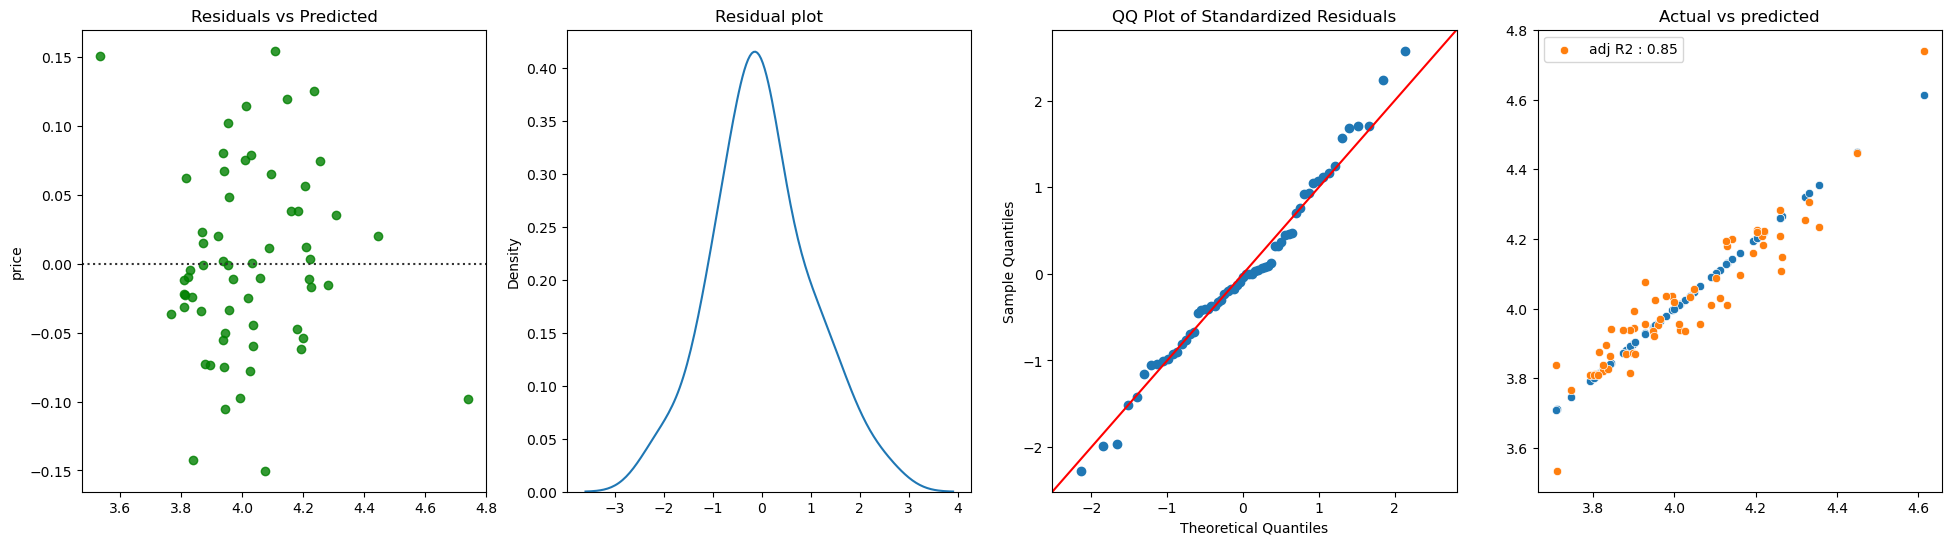

In [57]:
bagging_regressor = BaggingRegressor(
    base_estimator=ridge_pipe,
    n_estimators=120,
    random_state=42,
    n_jobs=-1)
# # Define the cross-validation strategy
rkf = RepeatedKFold(n_splits=10, random_state=42)

cv_results = cross_validate(bagging_regressor, X_train,y_train, cv=rkf, scoring='r2',n_jobs=-1,return_train_score=True,error_score="raise")
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

sc=StandardScaler()
predictions = cross_val_predict(bagging_regressor, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
ax4.set_title("Actual vs predicted")
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.show()

### Boosting

Mean Train Score: 0.943290293435294
Standard Deviation of Train Scores: 0.004067933139561148
Mean Test Score: 0.898359068830866
Standard Deviation of Test Scores: 0.07149936645331649
Mean absolute Error: 0.05125123825370302
R-squared on holdout set: 0.8773444957257776
Adjusted R-squared on holdout set: 0.8498095866029929


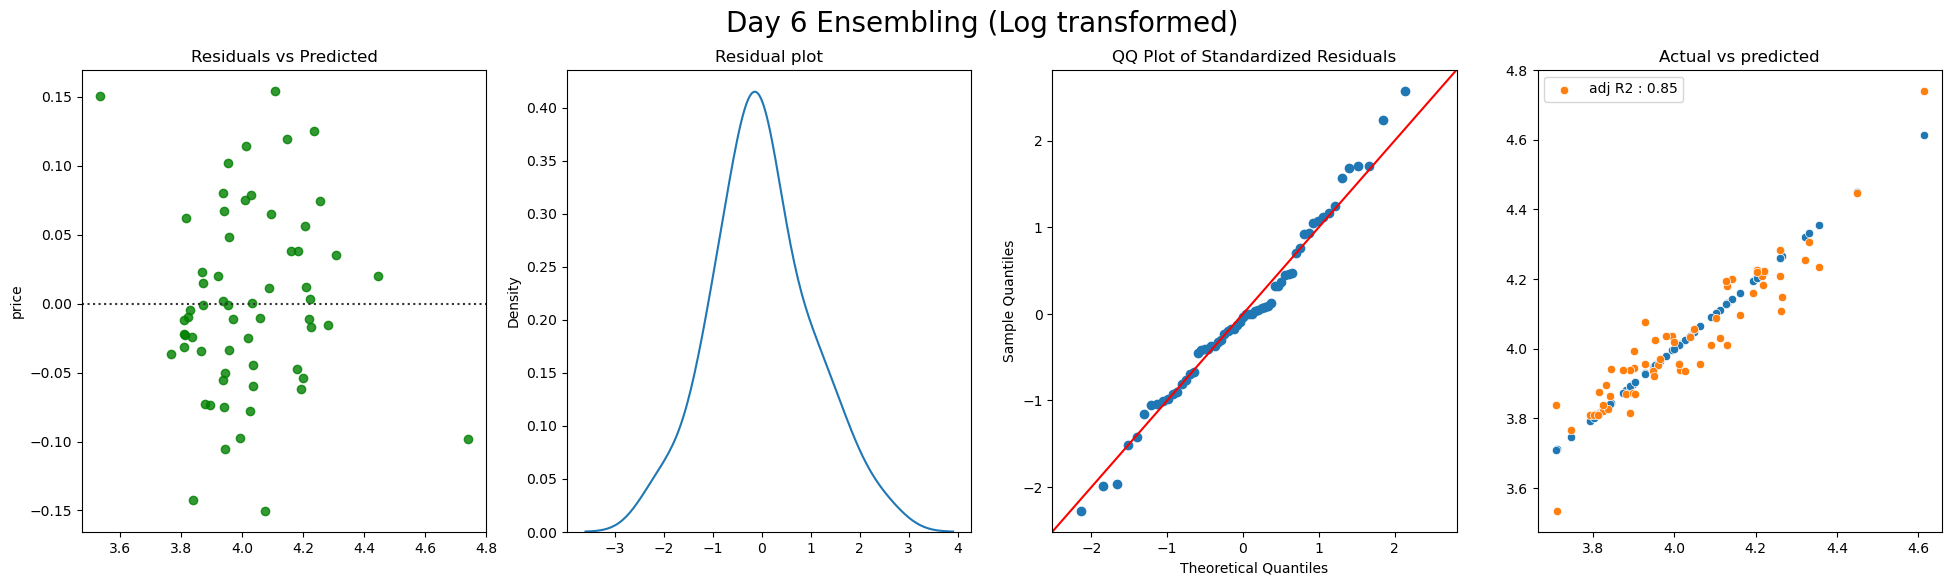

In [58]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline with elastic Regressor
elastic_pipe = Pipeline([
    ("pandas",FunctionTransformer(to_dataframe)),
    ('imputer', imputer),
    ('Ridge', Ridge(alpha=0.505))
])

# Wrap the pipeline in an AdaBoost Regressor
boosting_elastic = AdaBoostRegressor(estimator=elastic_pipe, n_estimators=100, random_state=42)

# Train the model
boosting_elastic.fit(X_train, y_train)

# Predict and evaluate
cv_results = cross_validate(boosting_elastic, X_train,y_train, cv=rkf, scoring='r2',n_jobs=-1,return_train_score=True,error_score="raise")
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

sc=StandardScaler()
predictions = cross_val_predict(bagging_regressor, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
ax4.set_title("Actual vs predicted")
ax4.set_xlabel("")
ax4.set_ylabel("")
fig.suptitle('Day 6 Ensembling (Log transformed)', fontsize=20)
plt.show()

Both Bagging and boosting Same Scores which are little lesser than actual model.Our base estimator looks Strong enough

### Testing

In [59]:
transform_pipe = Pipeline([
    ('imputer', imputer)
])
# Fit the transformation pipeline on the training data
X_train_transformed=transform_pipe.fit_transform(X_train)

# Transform the test data
X_test_transformed = transform_pipe.transform(X_test)
X_test_transformed.shape

(61, 15)

In [60]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import jarque_bera

# X_test_transformed = imputer.transform(X_test)
# X_test_transformed = pd.DataFrame(X_test_transformed, columns=imputer.get_feature_names_out())
# # Add a constant (intercept term)
X_test_transformed = sm.add_constant(X_test_transformed)

# Durbin-Watson test for autocorrelation
dw_test = durbin_watson(residuals)
print(f"Durbin-Watson test statistic: {dw_test}")
# Residuals Normailty check
shapiro_test = shapiro(residuals)  #for small datasets
print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
jb_test = jarque_bera(residuals)   
print(f"Jarque-Bera test: Statistic={jb_test[0]}, p-value={jb_test[1]}")
# Breusch-Pagan test for Homoscedastic residuals
bp_test = het_breuschpagan(residuals, X_test_transformed)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))
# Multi-collinearity
def condition_index(X):
  if not np.all(X.shape[1] >= 2):
    raise ValueError("Input matrix must have at least two columns.")
  return np.linalg.cond(X)

condition_number = condition_index(transform_pipe.transform(X_train))
print(f"Condition number: {condition_number:.4f}")

Durbin-Watson test statistic: 1.7419611966087951
Shapiro-Wilk test: Statistic=0.9846987128257751, p-value=0.643904983997345
Jarque-Bera test: Statistic=0.5325602241184733, p-value=0.766224468724395
{'Lagrange multiplier statistic': 14.232102299485748, 'p-value': 0.5080038169605918, 'f-value': 0.9129404783569686, 'f p-value': 0.5563299903318011}
Condition number: 16.4192


All test passed.

### Original Scale Predictions
(Not for evaluation as Dependent variable is skewed)

Mean Absolute Error in Original Scale (Unbiased): 1409.2739638412738
Mean Absolute Error in Original Scale (biased): 1345.5924425550895


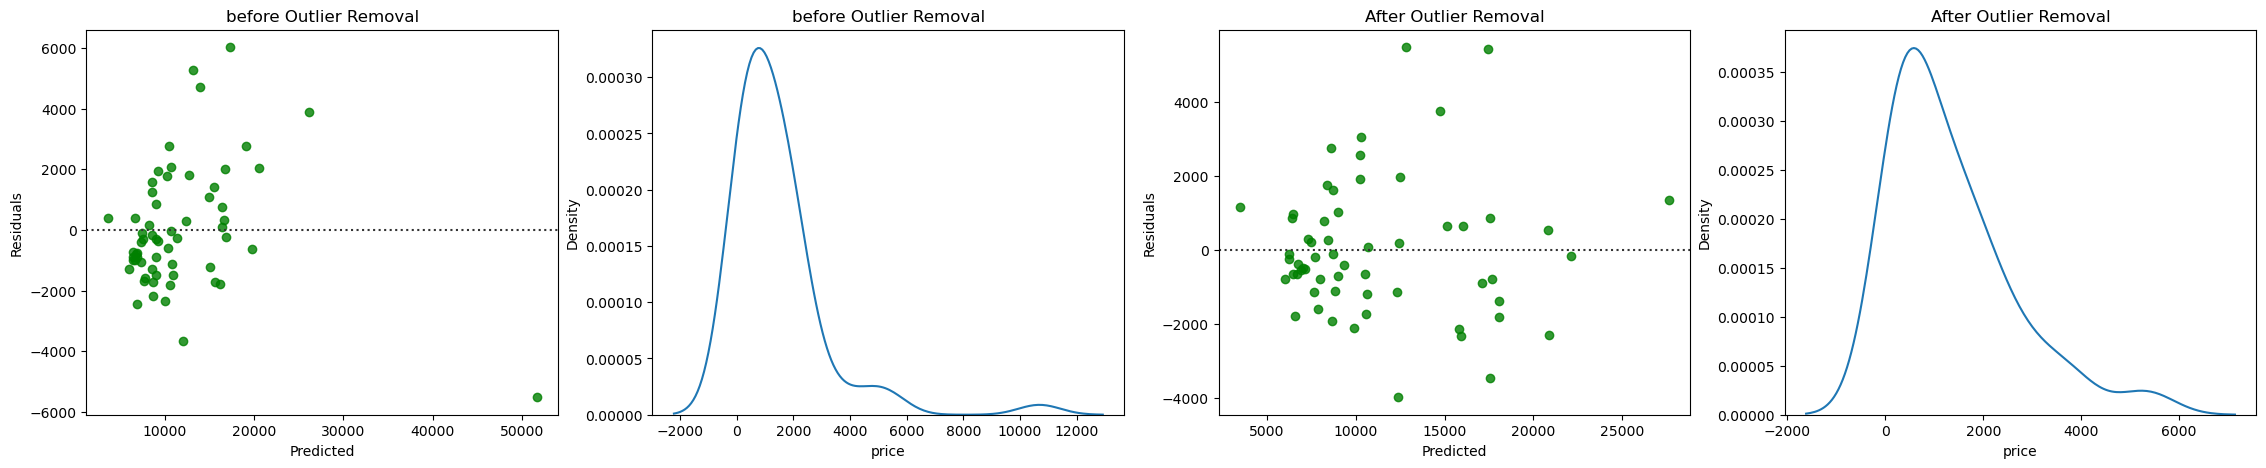

In [61]:
predictions = cross_val_predict(elastic_pipe, X_test, y_test)
residuals = y_test - predictions
# Sample data (assuming y_test and predictions are in log10 scale)
y_test_transformed = y_test
predictions_transformed = predictions

# Convert predictions back to original scale
y_test_original = 10**y_test_transformed
predictions_original = 10**predictions_transformed

# Calculate the absolute error in the original scale
residuals_original = np.abs(y_test_original - predictions_original)

# Calculate mean absolute error in the original scale
mae_original = np.mean(residuals_original)

# Outliers
X_test_after=X_test[~X_test.index.isin([22,35])]
y_test_after=y_test[~y_test.index.isin([22,35])]

predictions_after = cross_val_predict(elastic_pipe, X_test_after, y_test_after)
residuals_original_after = y_test_after - predictions_after
# Sample data (assuming y_test and predictions are in log10 scale)
y_test_transformed_after = y_test_after
predictions_transformed_after = predictions_after

# Convert predictions back to original scale
y_test_original_after = 10**y_test_transformed_after
predictions_original_after = 10**predictions_transformed_after

# Calculate the absolute error in the original scale
residuals_original_after = np.abs(y_test_original_after - predictions_original_after)

# Calculate mean absolute error in the original scale
mae_original_after = np.mean(residuals_original_after)
print("Mean Absolute Error in Original Scale (Unbiased):", mae_original)
print("Mean Absolute Error in Original Scale (biased):", mae_original_after)
fig,[ax1,ax2,ax3,ax4]=plt.subplots(ncols=4,figsize=(28,5))
sns.residplot(x=predictions_original, y=y_test_original, color='g',ax=ax1)
ax1.set_title("before Outlier Removal")
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Residuals')
sns.kdeplot(residuals_original,ax=ax2)
ax2.set_title("before Outlier Removal")
sns.residplot(x=predictions_original_after, y=y_test_original_after, color='g',ax=ax3)
ax3.set_title("After Outlier Removal")
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Residuals')
sns.kdeplot(residuals_original_after,ax=ax4)
ax4.set_title("After Outlier Removal")
plt.show()

Performance significantly increased after removing 2 data points.either we are not having information to cover those variance or they could be potential outliers

## Conclusion
- The statistical tests and diagnostics confirm that the models meet the assumptions of linear regression. And we are Explaining about 85% of data variation